In [14]:
import nltk
import re

from nltk import grammar, parse
from nltk.parse.util import load_parser

from typing import Callable, List, Set


# Chat GPT Story Parser: Gordon Copeland (gcc68), Shiman Zhang (sz383), and Teddy Lazar (tl688)




In [40]:
nltk.data.show_cfg('./final_grammar.fcfg')

S[SEM=<?subj(?vp)>] -> DP[NUM=?b, SEM=?subj] VP[NUM=?b, SEM=?vp]
S[SEM=<?vp(?subj)>] -> NP[NUM=?b, SEM=?subj] VP[NUM=?b, SEM=?vp]
DP[NUM=?n,SEM=<?det(?nom)> ] -> Det[NUM=?n,SEM=?det]  N[NUM=?n,SEM=?nom]
VP[NUM=?n,SEM=<?v(?obj)>] -> IV[NUM=?n,SEM=?v] N[SEM=?obj]
#Determiners#
Det[SEM=<\P Q.all n.(P(n) -> not Q(n))>] -> 'no'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'a'
Det[NUM=sg, SEM=<\P Q.exists h.all n.(P(n) -> Q(n) & (h!=n -> !Q(n)))>] -> 'the'
Det[NUM=sg,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'every'
Det[NUM=pl,SEM=<\P Q.all x.(P(x) & Q(x))>] -> 'both'
Det[NUM=pl, SEM=<\P Q. exists x.(P(x) & Q(x))>] -> 'their'
#Nouns#
N[NUM=sg, SEM=<\x.car(x)>] -> 'car'
N[NUM=pl, SEM=<\x.drawer(x)>] -> 'drawers'
N[NUM=sg, SEM=<\x.cat(x)>] -> 'cat'
N[NUM=sg, SEM=<\x.home(x)>] -> 'home'
N[NUM=sg, SEM=<\x.hours(x)>] -> 'hours'
N[NUM=sg, SEM=<\x.pat(x)>] -> 'pat'
N[NUM=sg,SEM=<\x.driveway(x)>] -> 'driveway'
N[NUM=sg,SEM=<\x.door(x)>] -> 'door'
N[NUM=sg,SEM=<\x.room(x)>] -> 'room'
N[NUM=pl,SEM=<\x.c

In [41]:
def parse_and_display(s, p, graphic:bool=True):
    for tree in p.parse(s.split()): 
        if graphic: 
            display(tree) 
        else: print(tree)

In [42]:
# Angela Liu
get_vowel = lambda w: f'vowel => {set(re.findall(r"[AEIOUaeiou]", w))}'.lower()
get_cons = lambda w: 'cons => {}'.format(set(re.findall(r"[^AEIOUaeiou\W0-9]", w))).lower()
follows = lambda w: f'le => {set([(i+1,j+1) for i in range(len(w)) for j in range(i, len(w)) if i != j])}'
precedes = lambda w: f'le => {set([(i+1,j+1) for i in range(len(w)) for j in range(i, len(w)) if i != j])}'
get_caps = lambda w: f'capital => {set(re.findall(r"[A-Z]", w))}'.lower()
glide = lambda w: f'glide => {set(re.findall(r"[WYwy]", w))}'.lower()
initial = lambda w: f'initial => {set([w[0]])}'.lower()
final = lambda w: f'final => {set([w[len(w) - 1]])}'.lower()



def emptysets(val:nltk.sem.evaluate.Valuation):
    val.update([(k,set()) for (k,v) in val.items() if v == 'set()'])
    
def to_model_str(word: str, special_rels: List[Callable[[str], str]]=[]) -> str:
    """
    Creates the string form of the model for the input word. This string is meant to be passed to `nltk.Valuation.fromstring`.
    By default, the function will only add the relations mapping i => i for i from 1 to the length of `word` and a relation 
    mapping char => the set of tuples (i, word[i]). The `special_rels` function allows you to specify additional relations to 
    be added to the valuation string.
    
    :param word: The word to create a model string for.
    :param special_rels: A list of functions that when called return a string of the form {relation_name} => {relation_contents}. Defaults to the empty list.
    :returns: a string representing the model for word
    """
    n = len(word)
    model_str = []
    char = []
    for i in range(1, n+1):
        model_str.append(f'{i} => {i}')
        char.append((i, word[i-1]))
    model_str.append(f'char => {set(char)}'.lower())
    return '\n'.join(model_str + [rel(word) for rel in special_rels]).replace("'", "")


## Short Story 1:
The dog ran home, and the cat followed to play. They arrived and the house was empty. The dog whined, and the cat meowed in response. They searched every room but found no sign of the owner. Feeling worried and confused, they decided to sit by the door and wait. Hours passed, and as the sun began to set, they started to give up hope. They heard the sound of a car that was pulling into the driveway. They rushed to the door, wagging their tails and meowing excitedly. The owner walked in and scooped both of them up, giving each a pat on the head. "I am sorry I was gone for a long walk and came back late today," the owner said. "I did not mind because I am so happy to be back and see you both, waiting for me."

In [540]:
pr = load_parser('./final_grammar.fcfg', trace=0,cache=False)
pr = load_parser('./ling4424-final.fcfg', trace=0,cache=False)


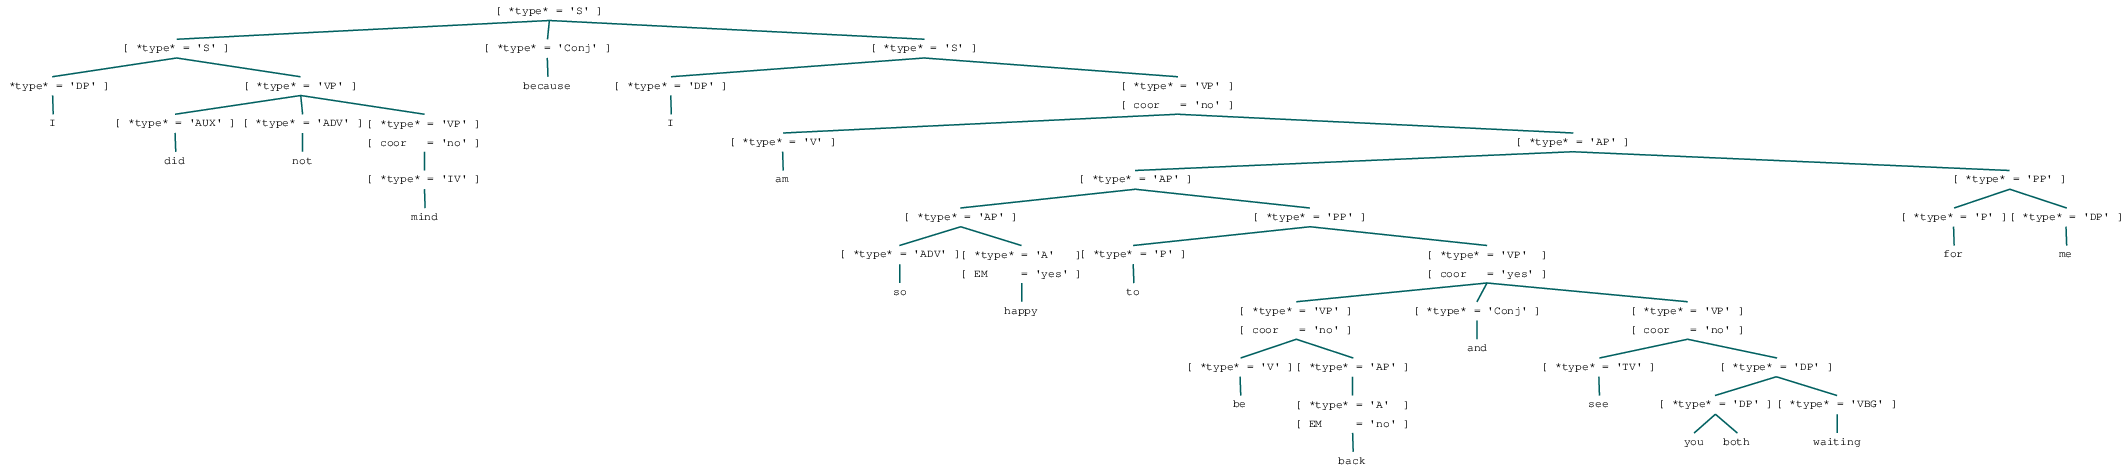

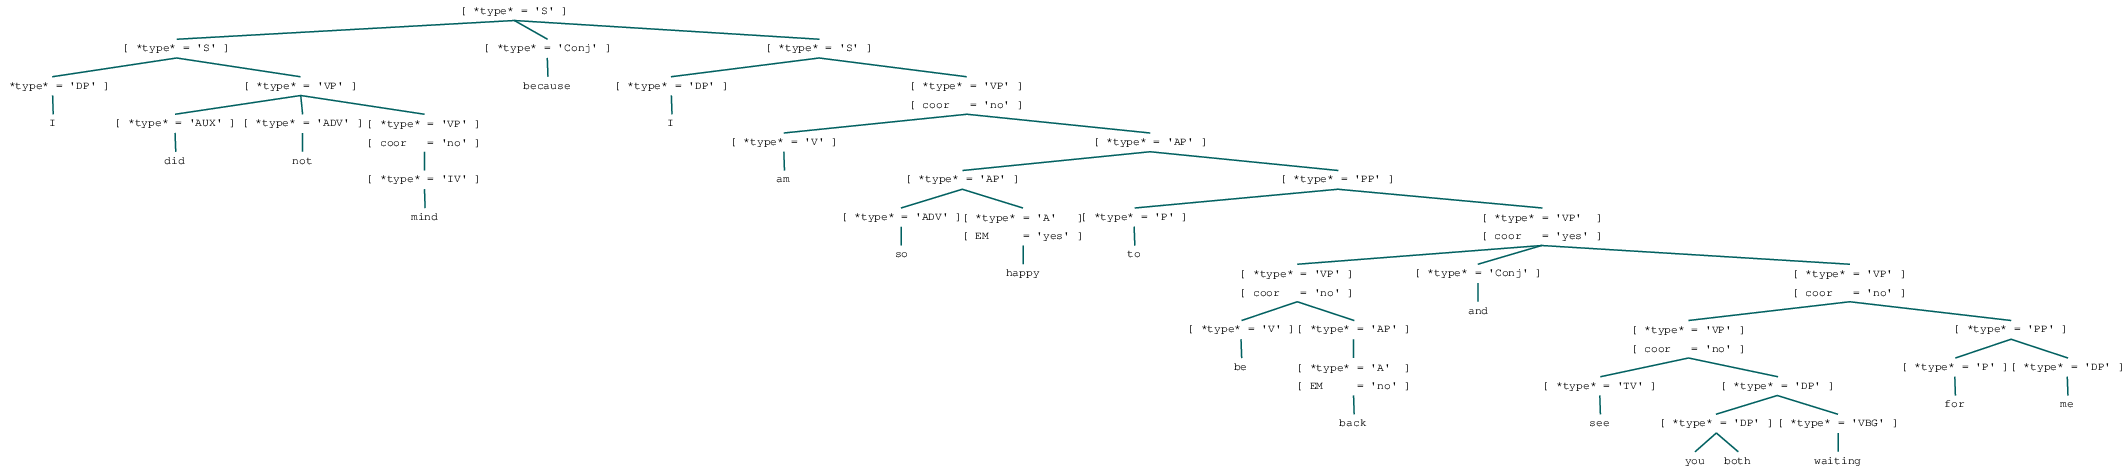

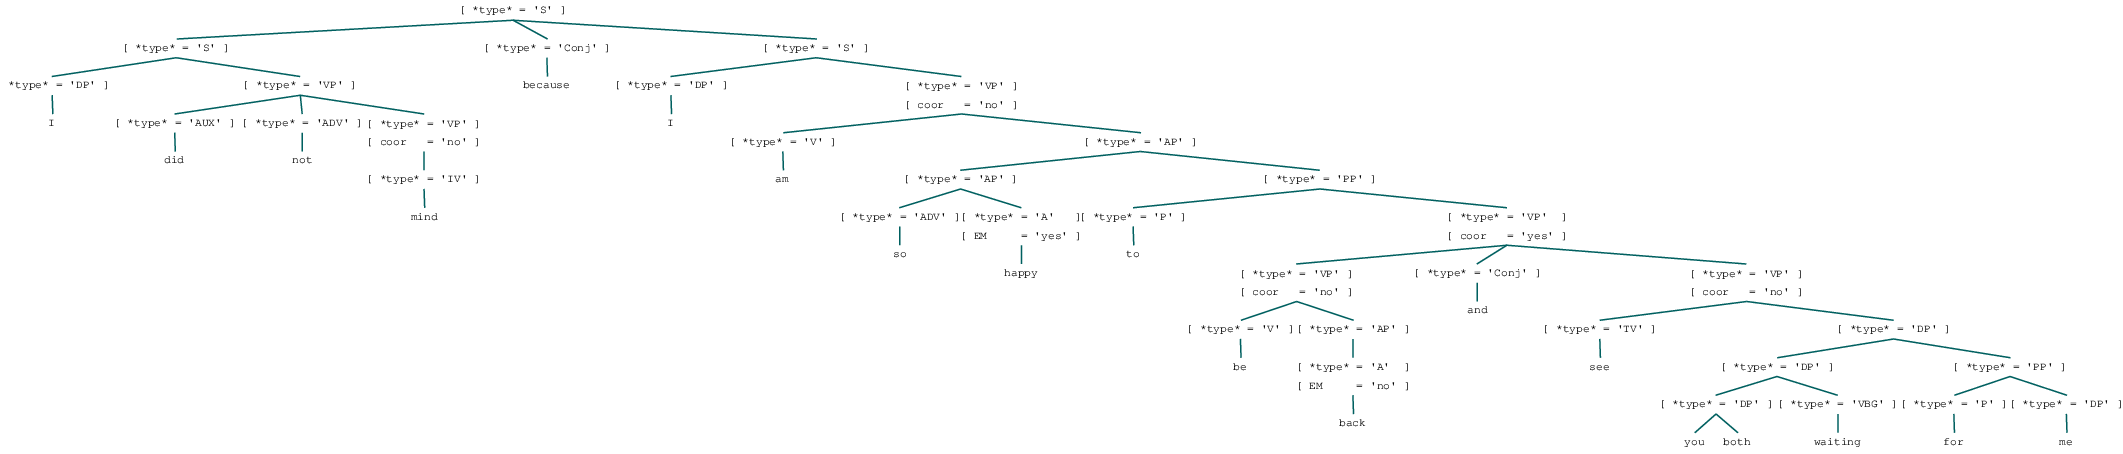

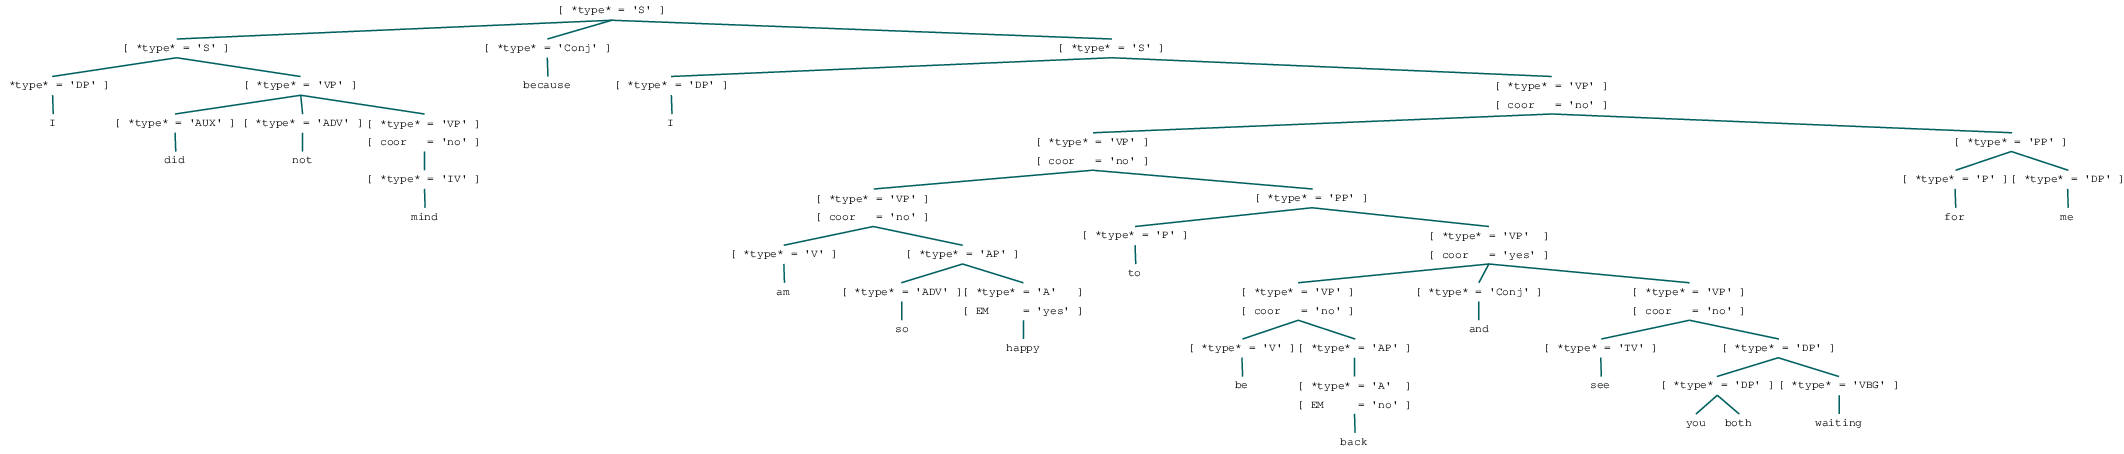

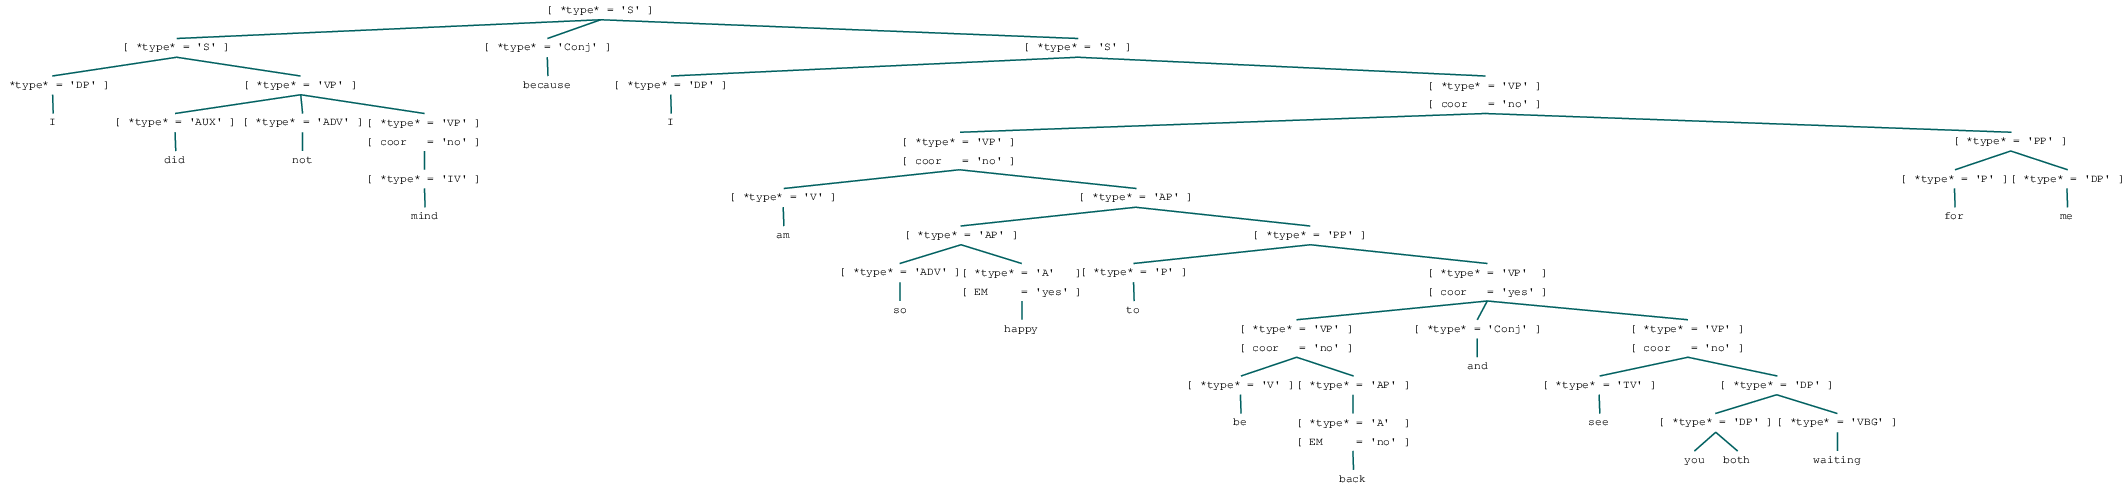

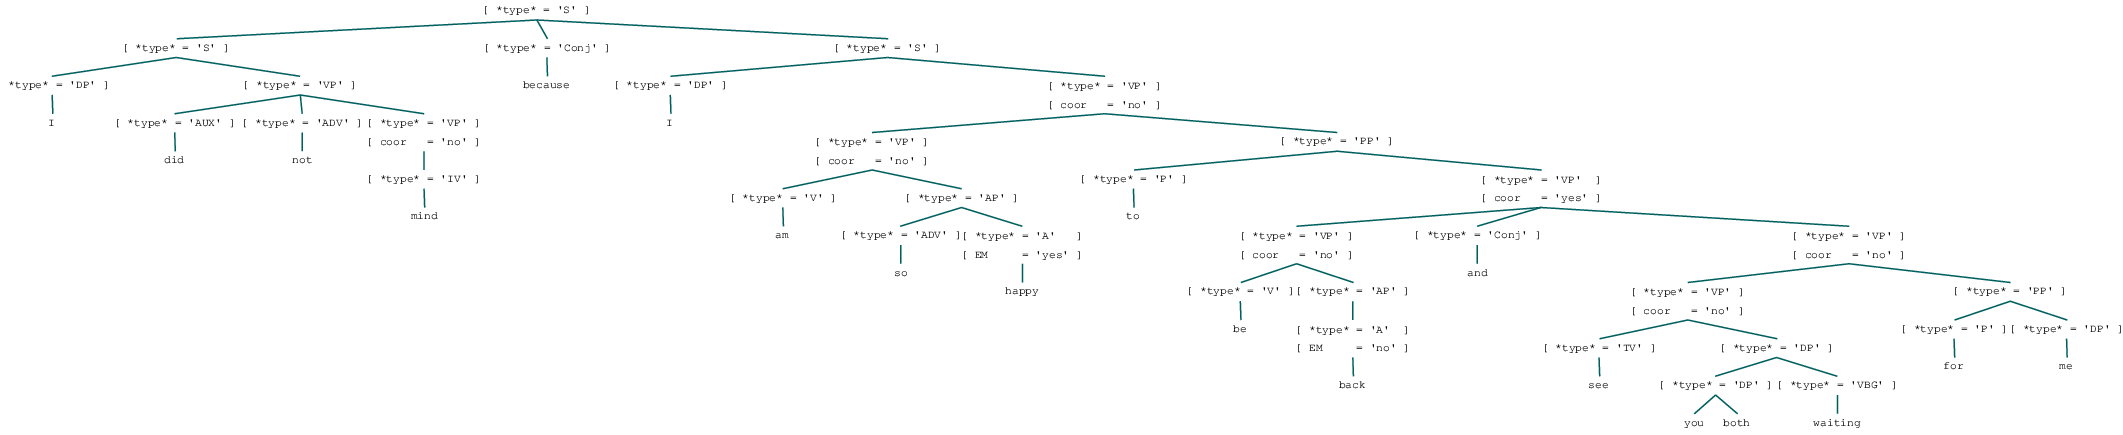

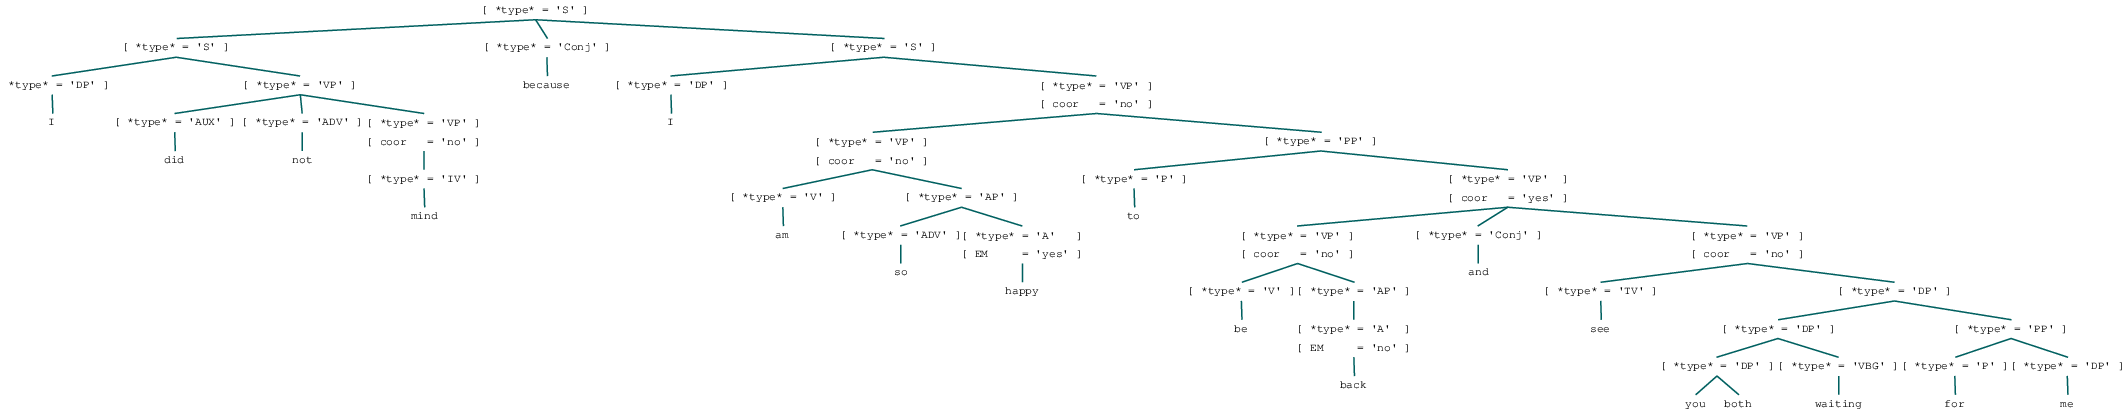

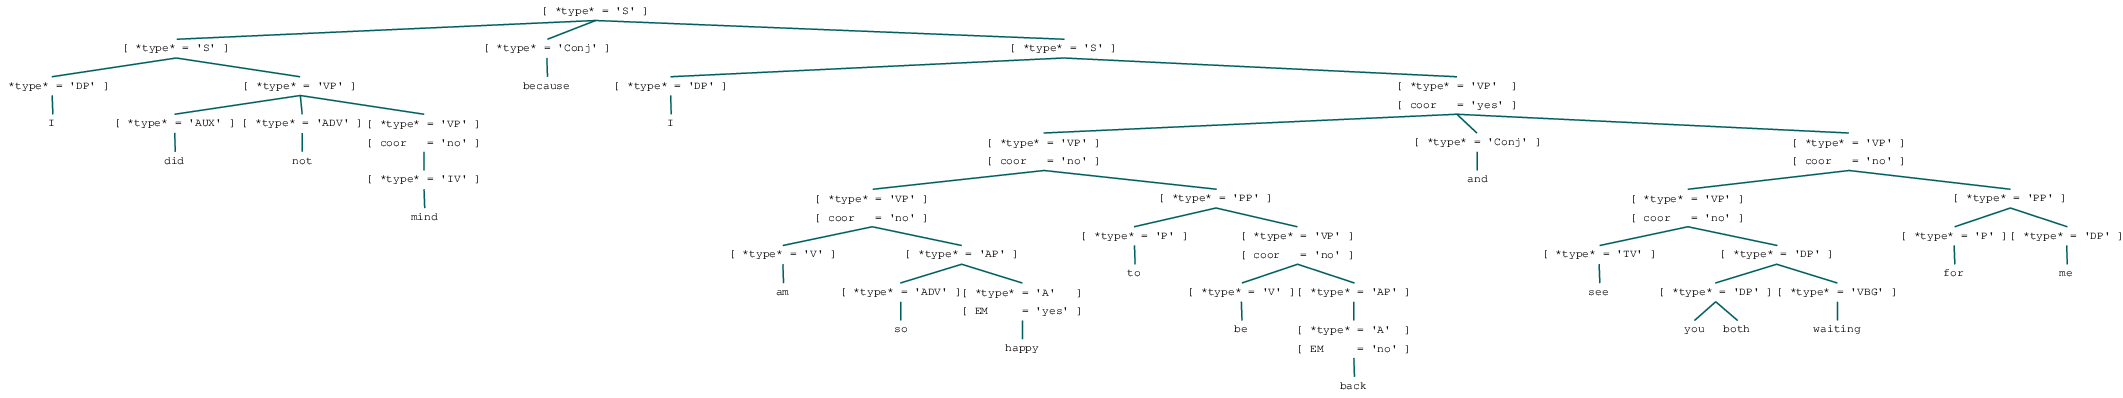

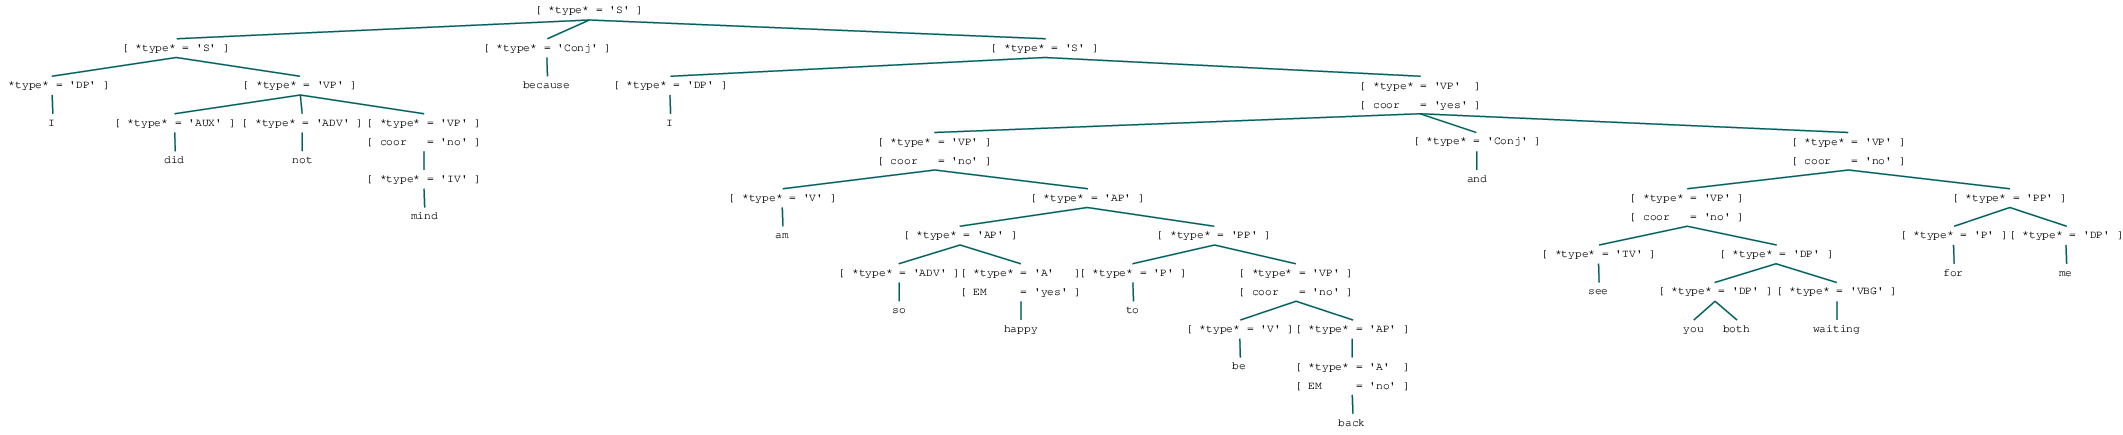

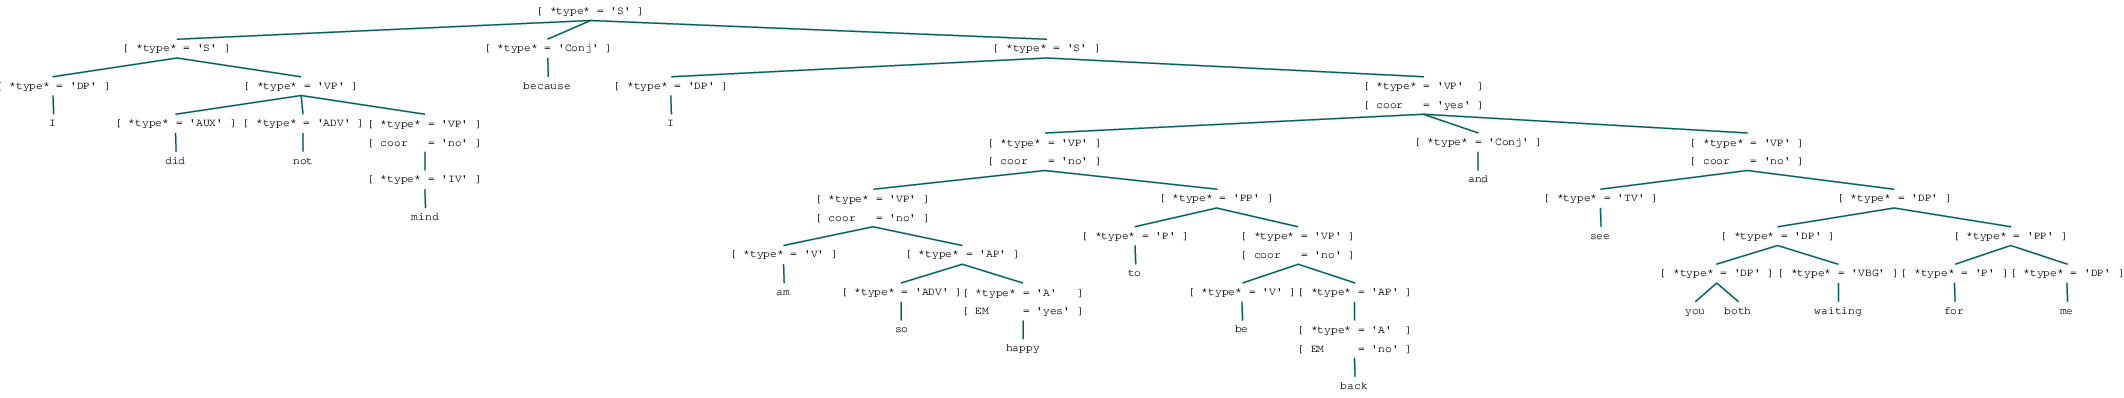

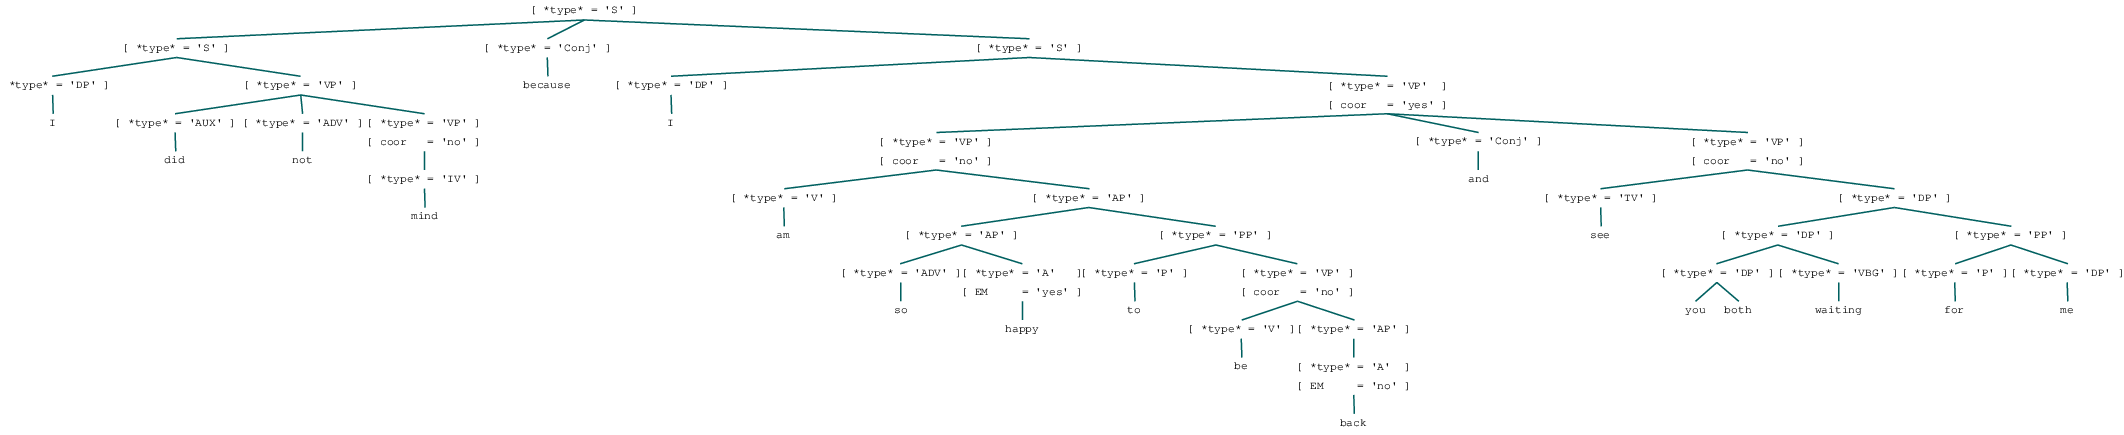

In [507]:
s1 = 'I did not mind because I am so happy to be back and see you both waiting for me'
parse_and_display(s1, pr)

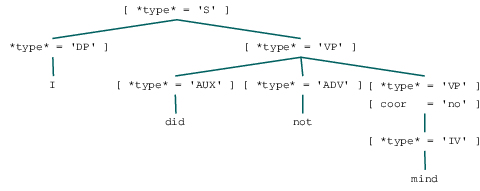

In [506]:
s1 = 'I did not mind'
parse_and_display(s1, pr)


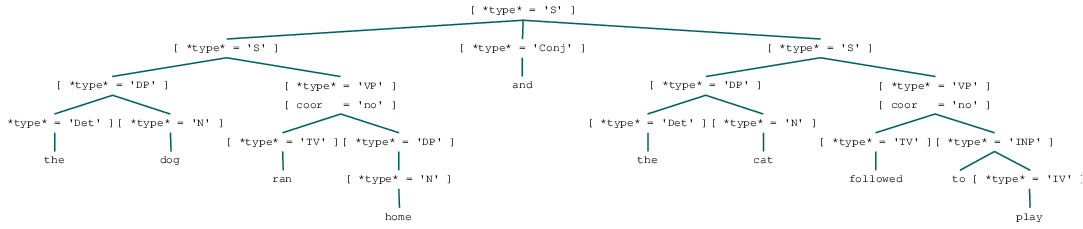

In [489]:
# e1 = [('aaaAYY',True),('baAEEET',True),('pAtrIot',False),('transItive',False),('transitive',False)]
s1 = 'the dog ran home and the cat followed to play'
parse_and_display(s1, pr)

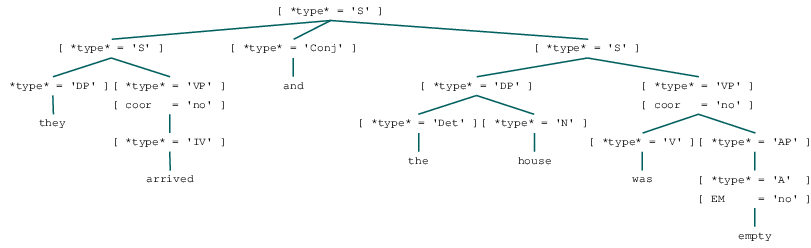

In [490]:
s2 = 'they arrived and the house was empty'
parse_and_display(s2, pr)

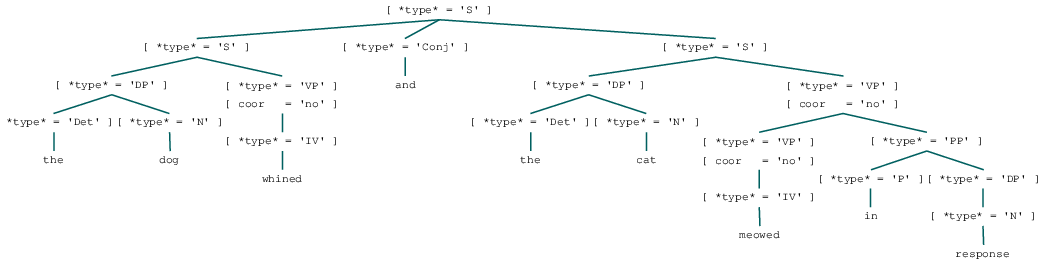

In [491]:
s3 = 'the dog whined and the cat meowed in response'
parse_and_display(s3, pr)

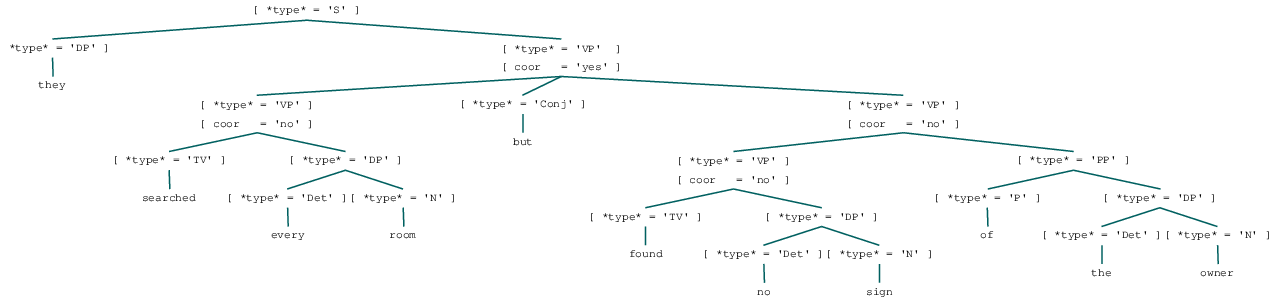

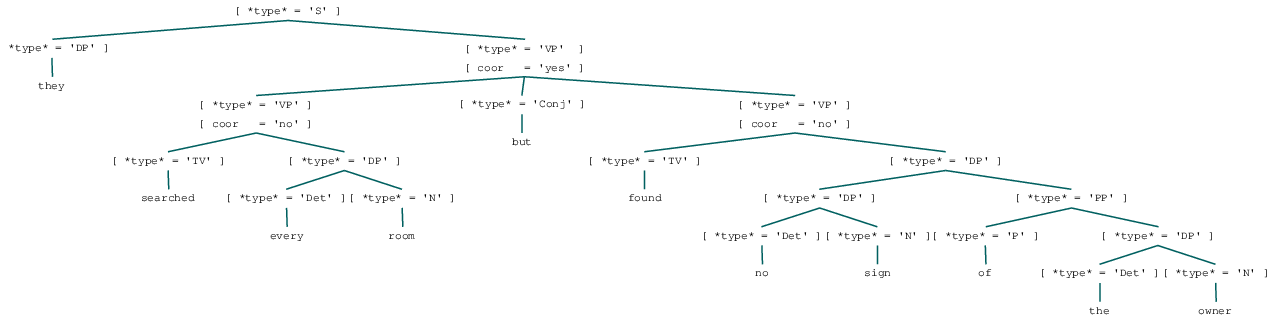

In [492]:
s4 = 'they searched every room but found no sign of the owner'
parse_and_display(s4, pr)

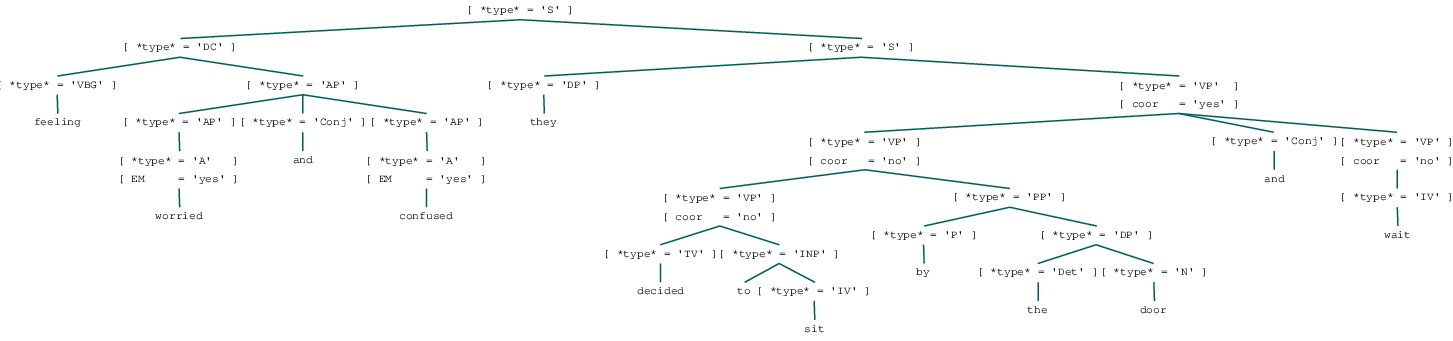

In [493]:
s5 = 'feeling worried and confused they decided to sit by the door and wait'
parse_and_display(s5, pr)

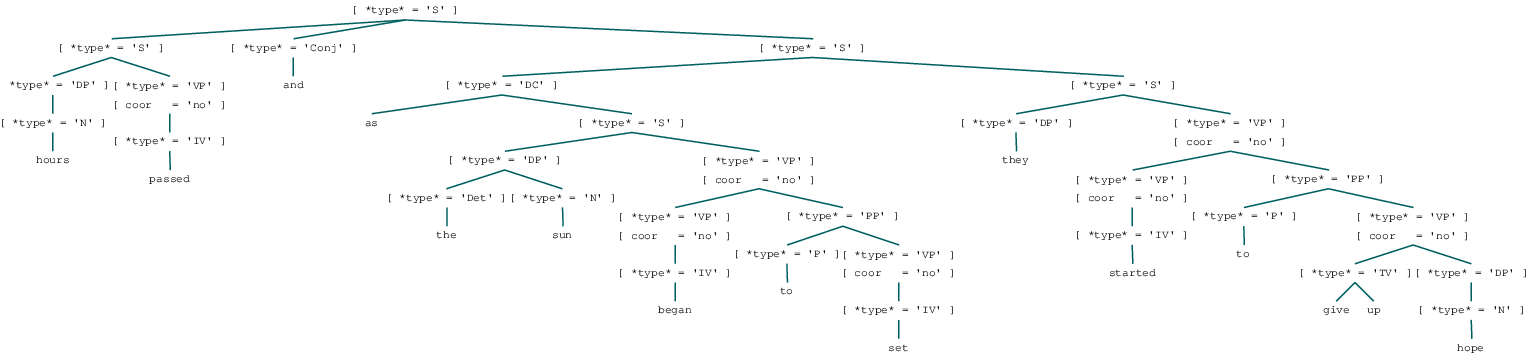

In [494]:
s6 = 'hours passed and as the sun began to set they started to give up hope'
parse_and_display(s6, pr)

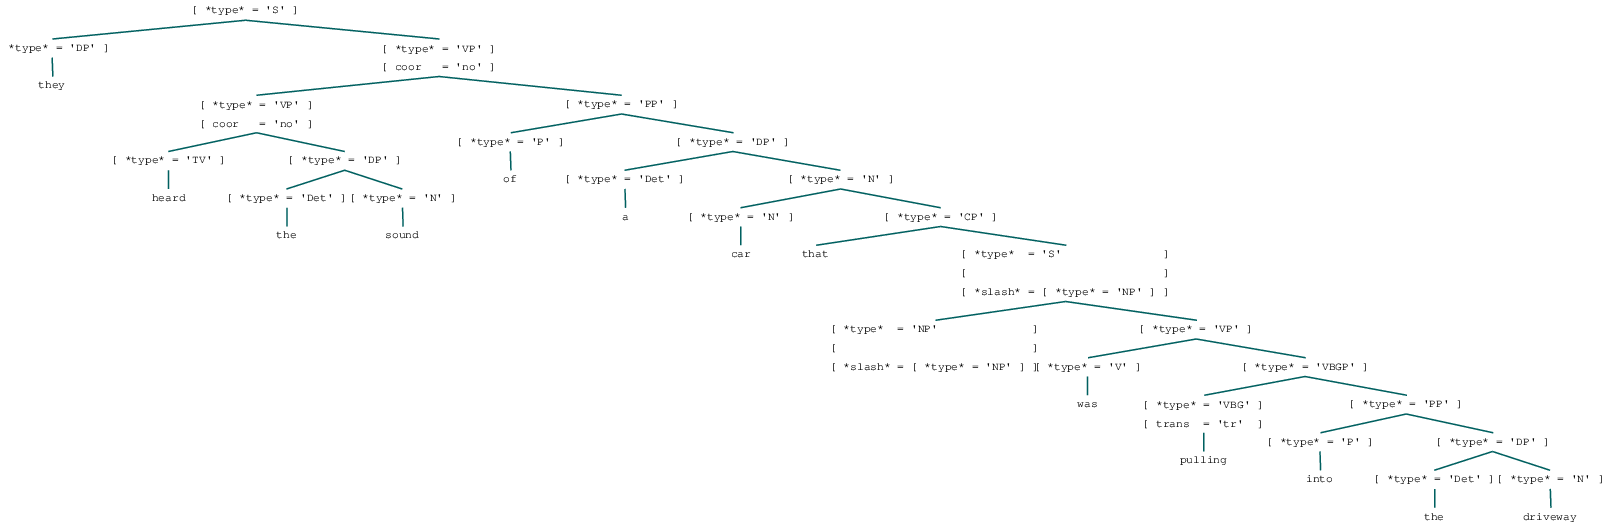

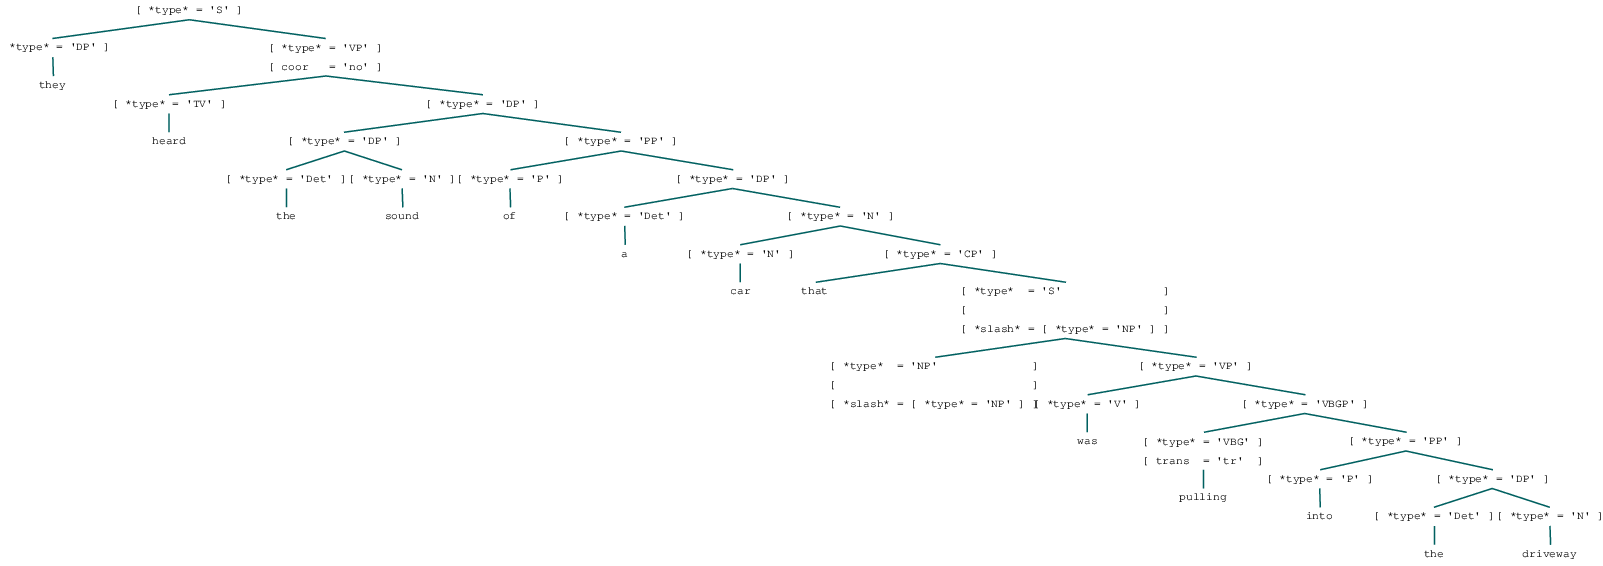

In [495]:
s7 = 'they heard the sound of a car that was pulling into the driveway'
parse_and_display(s7, pr)

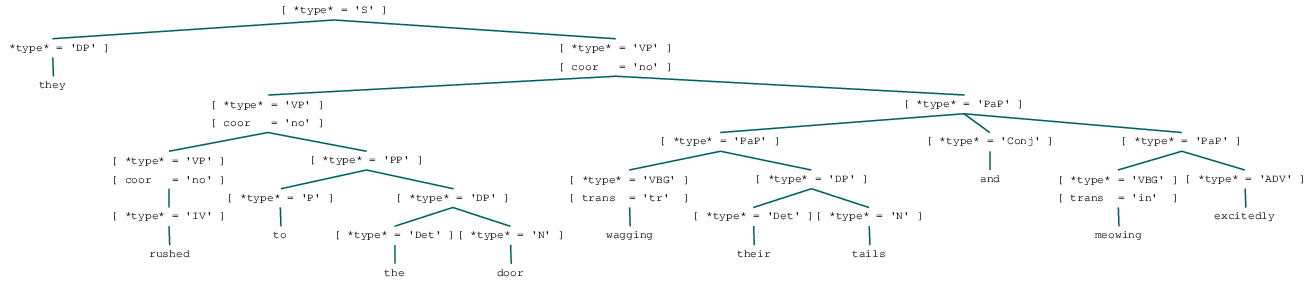

In [496]:
s8 = 'they rushed to the door wagging their tails and meowing excitedly'
parse_and_display(s8, pr)

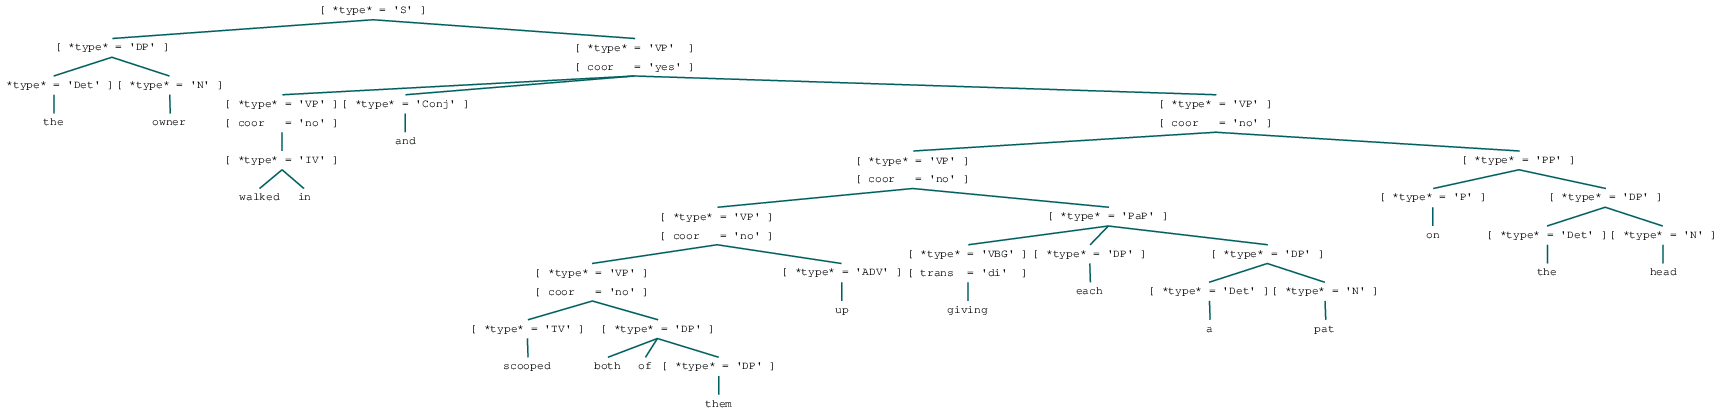

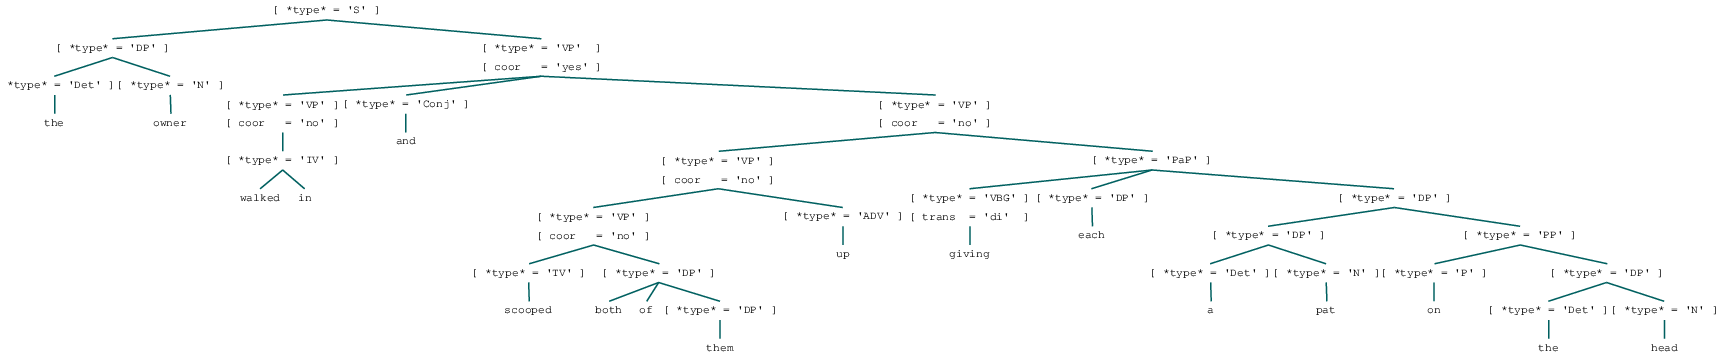

In [497]:
s9 = 'the owner walked in and scooped both of them up giving each a pat on the head'
parse_and_display(s9, pr)

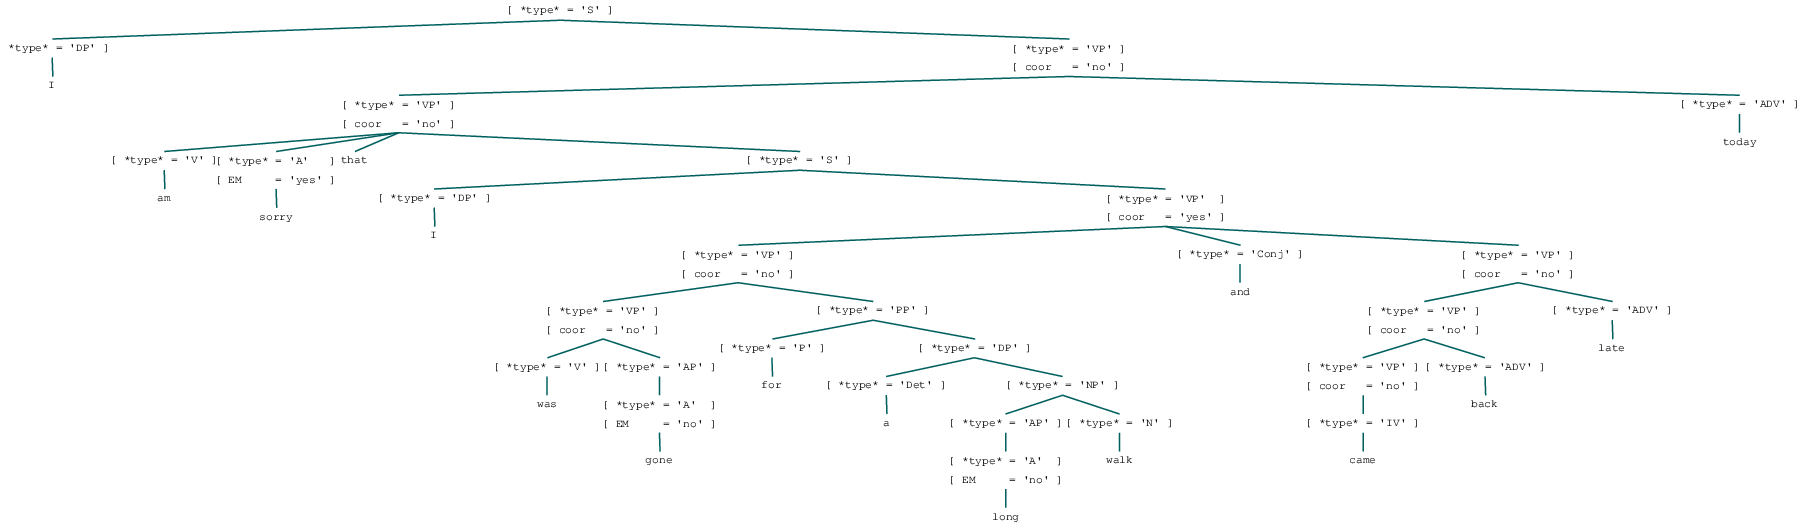

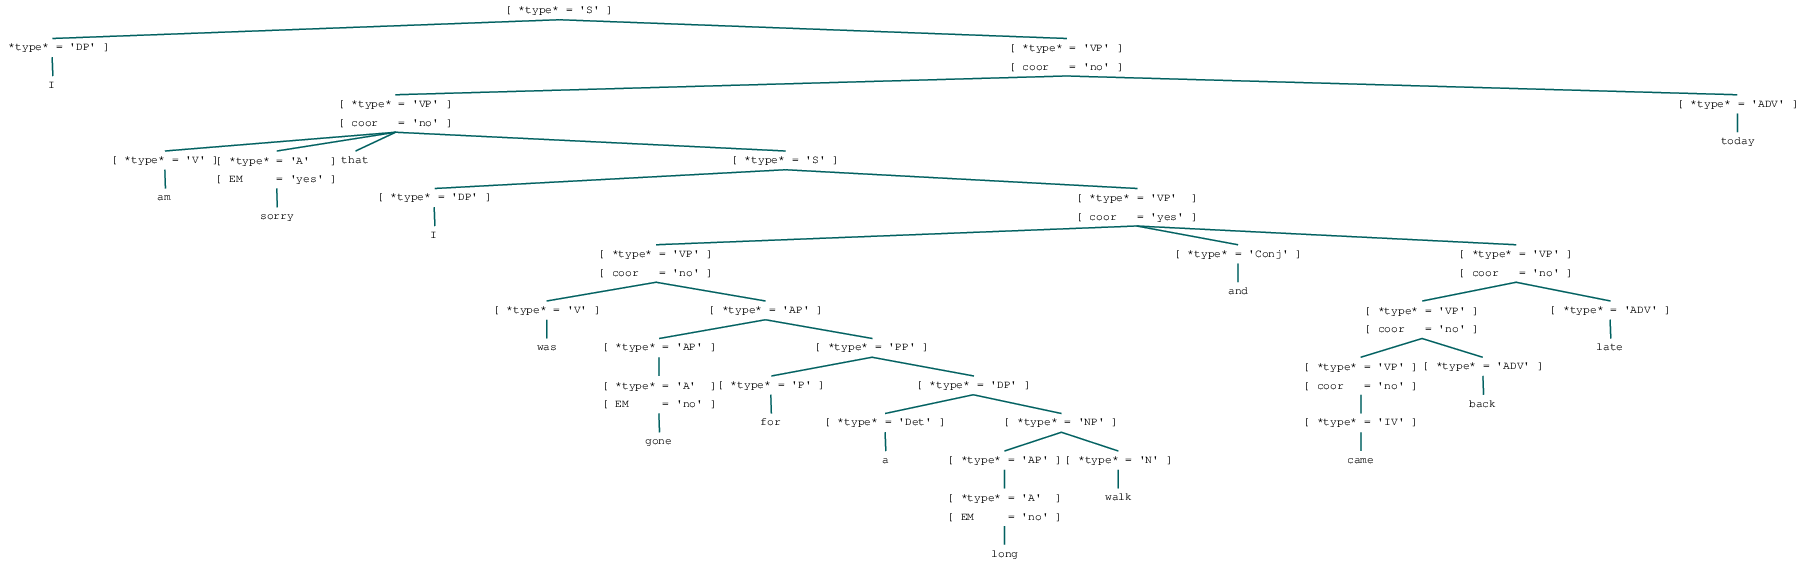

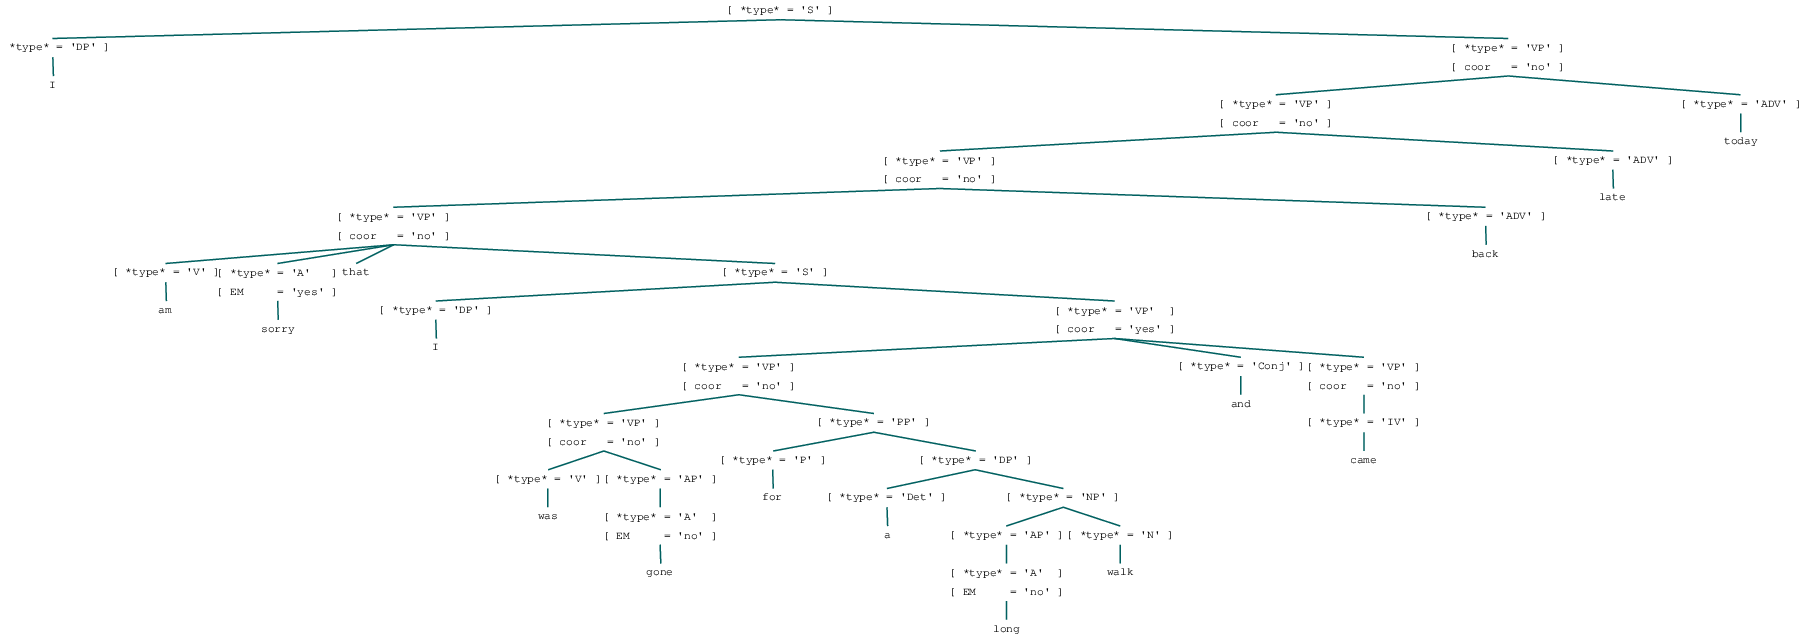

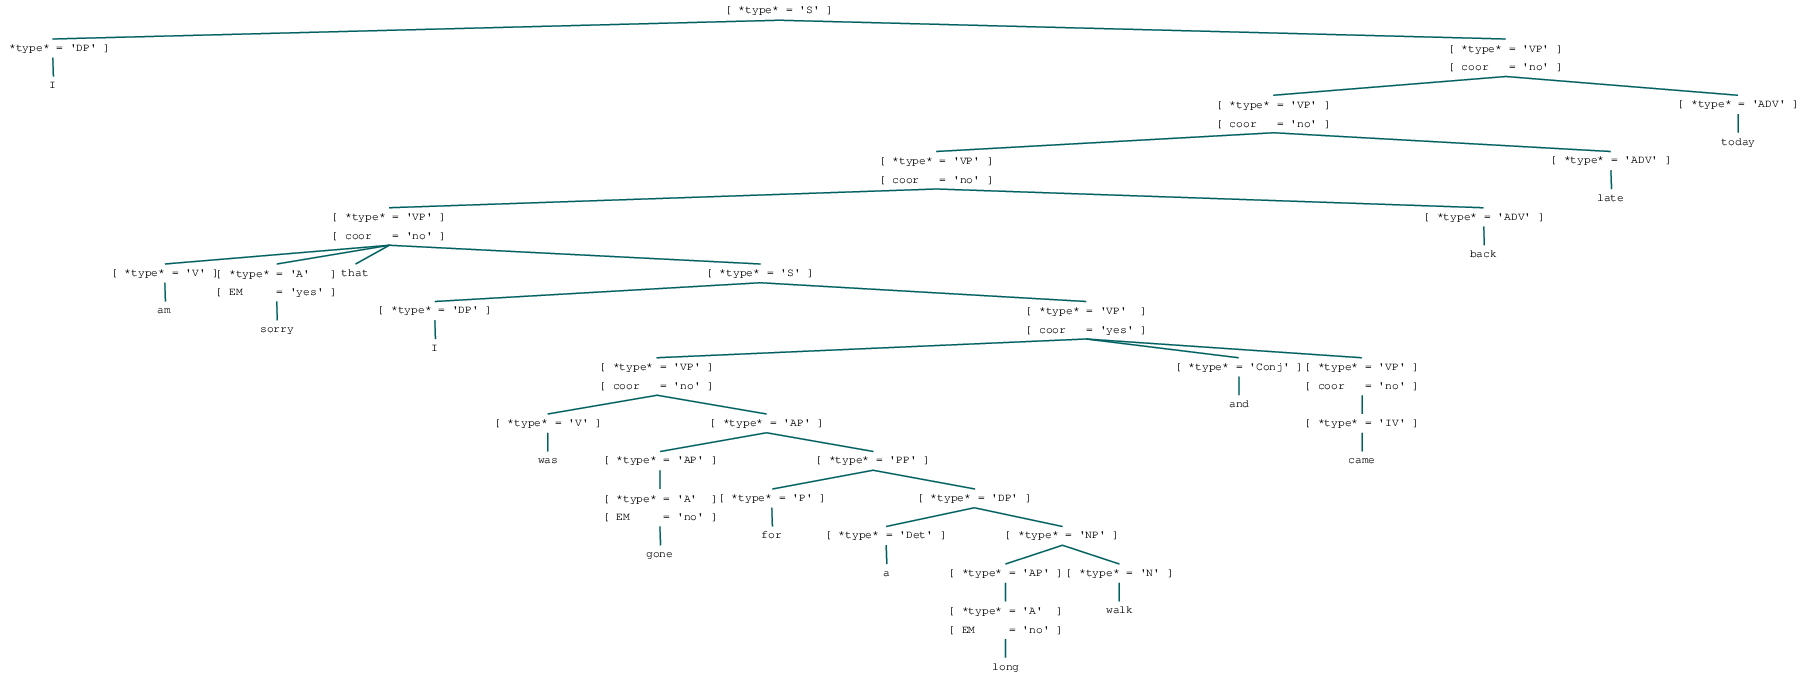

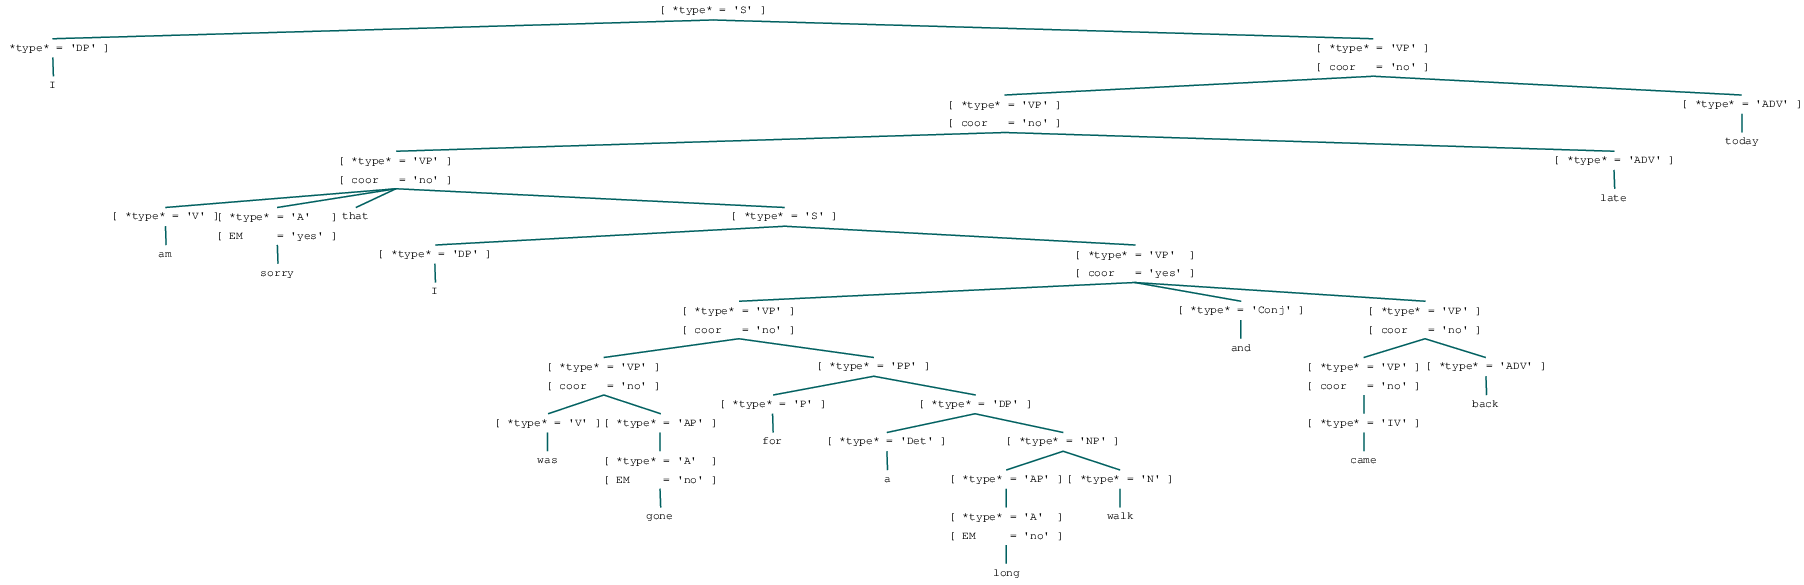

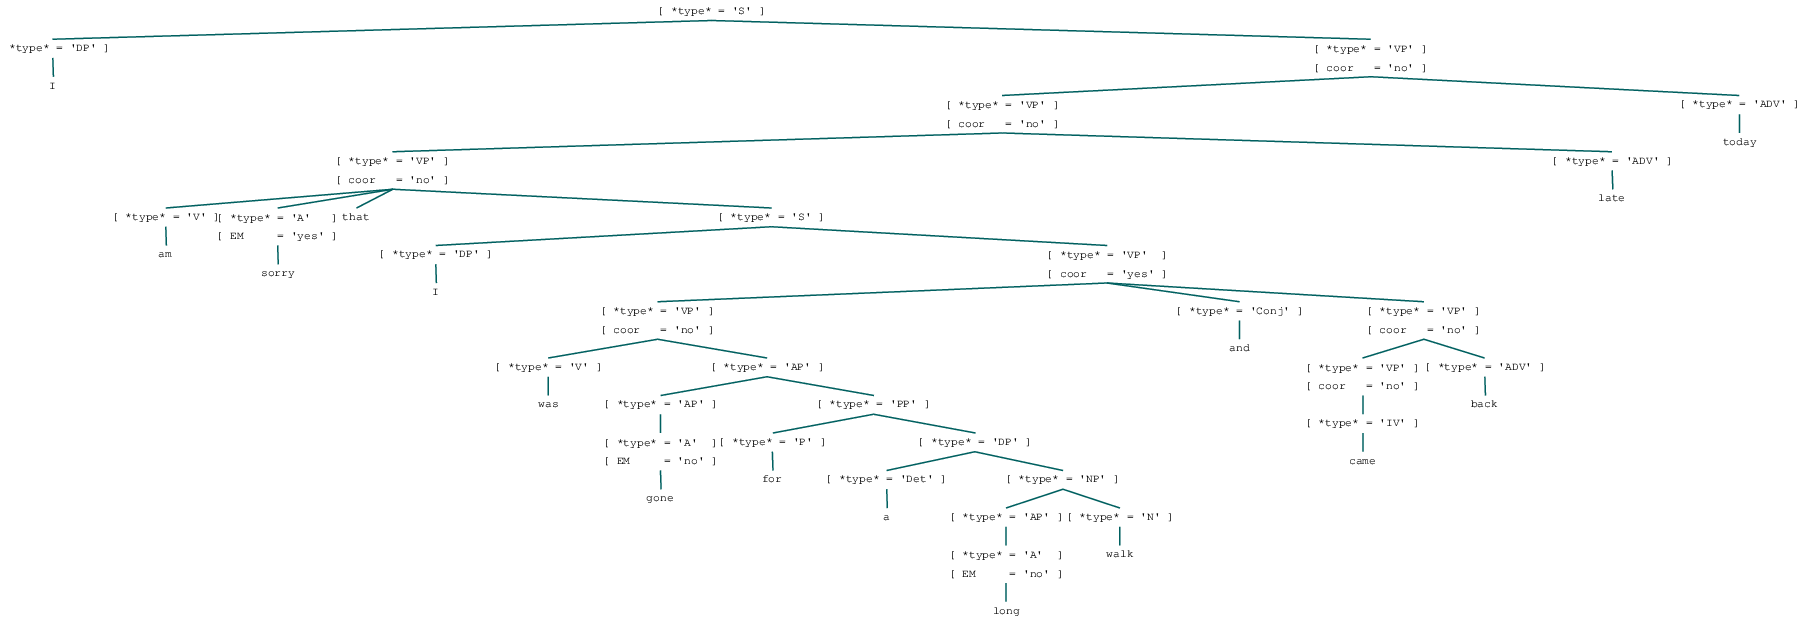

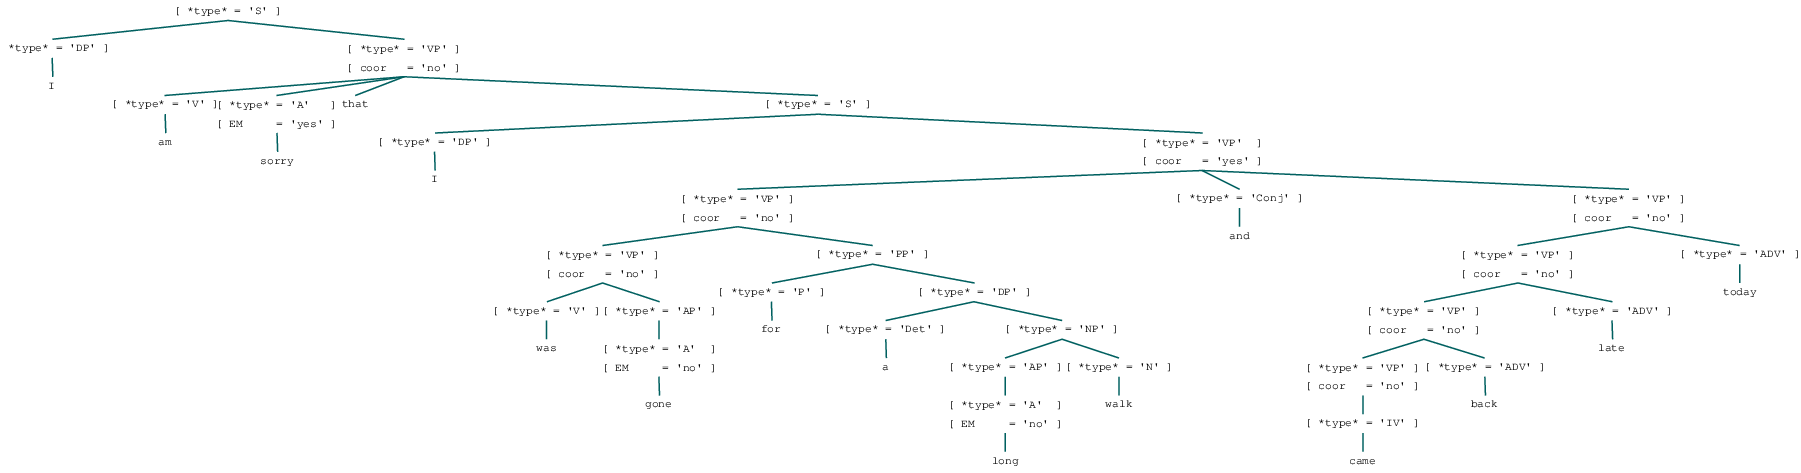

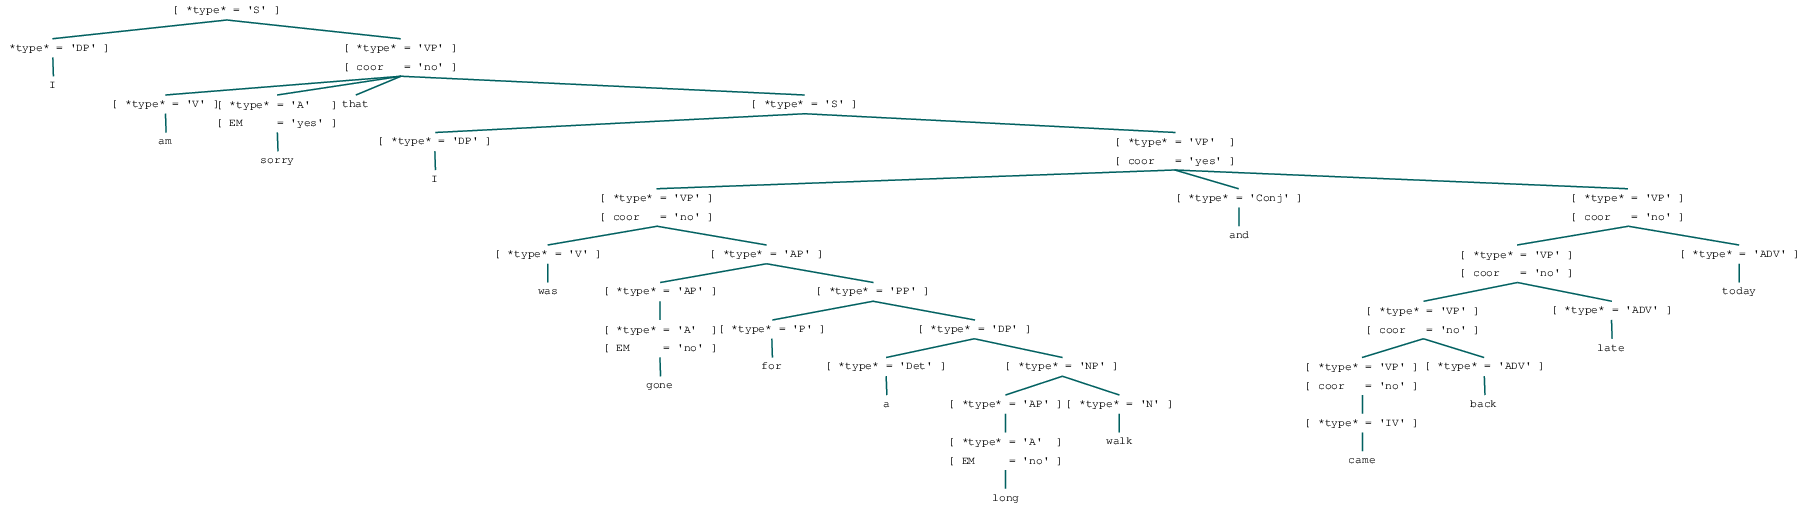

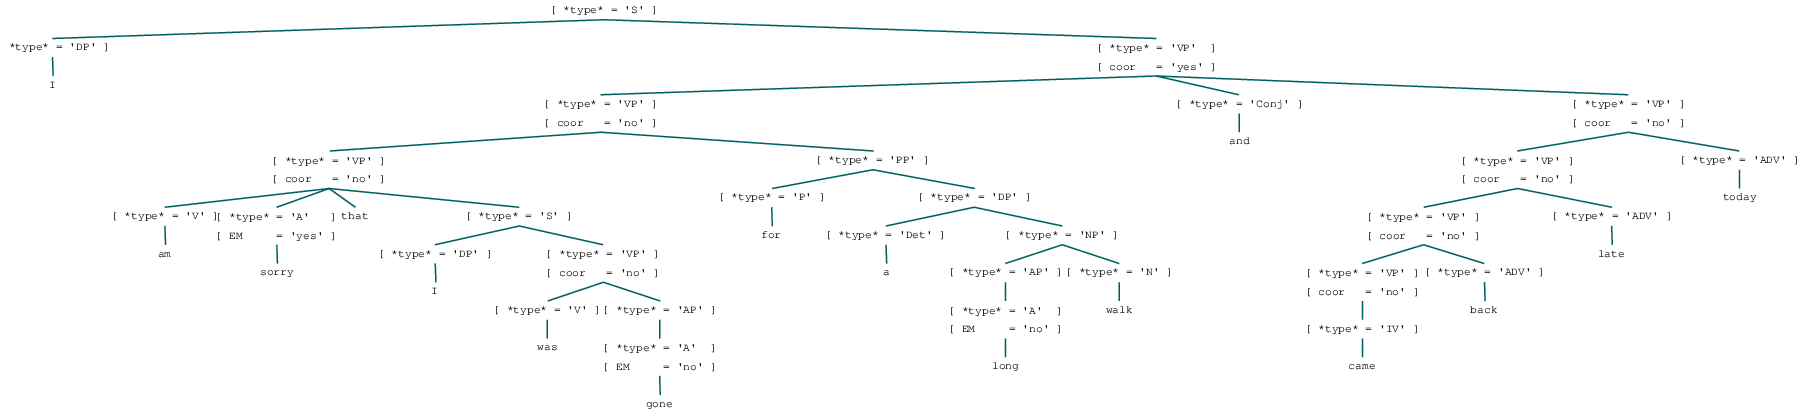

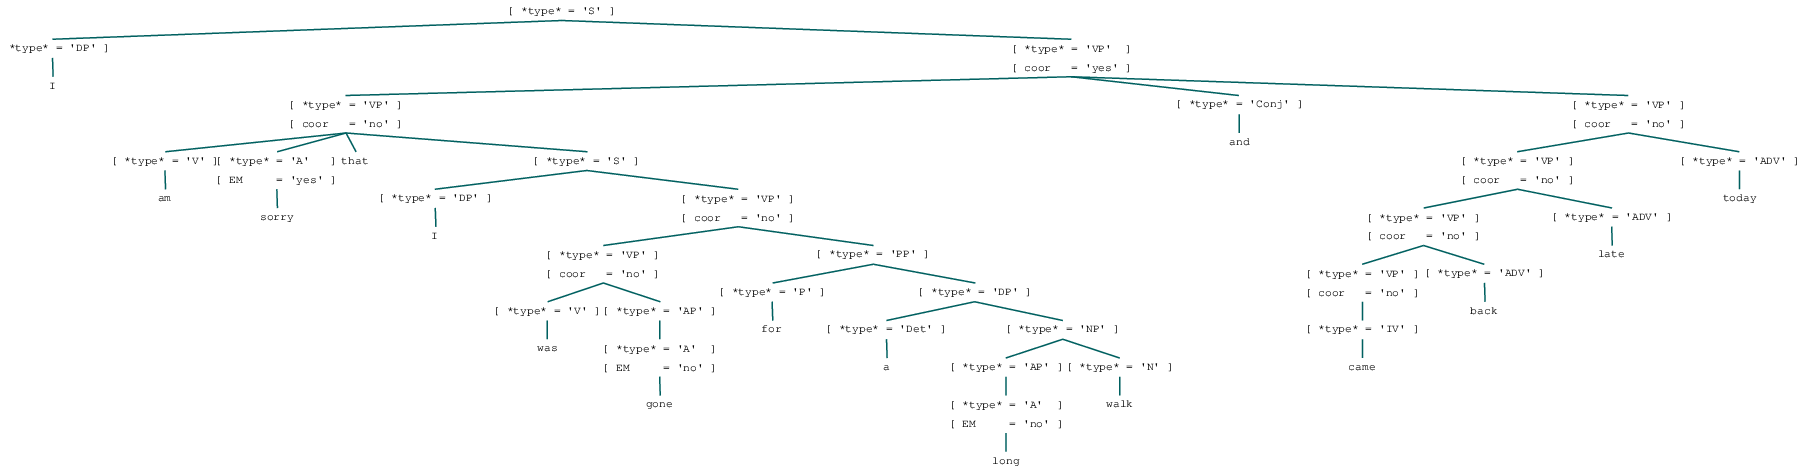

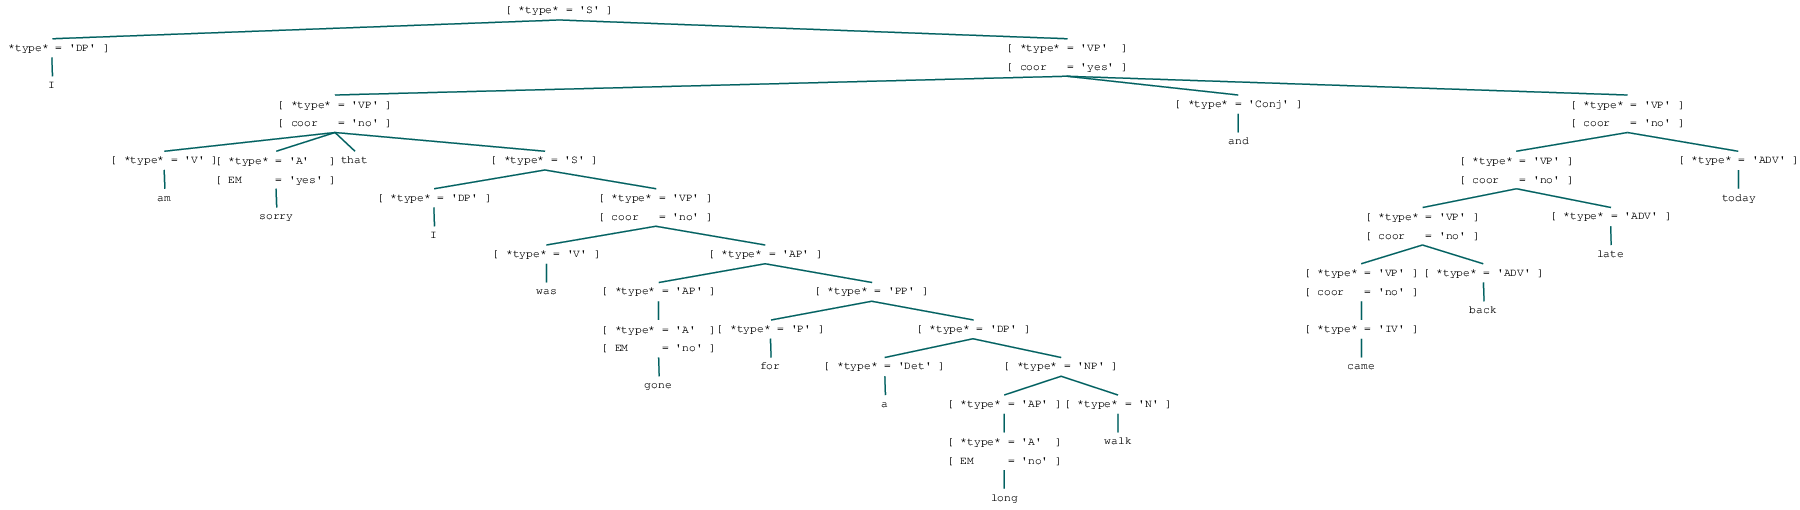

In [498]:
s10 = 'I am sorry that I was gone for a long walk and came back late today'
parse_and_display(s10, pr)

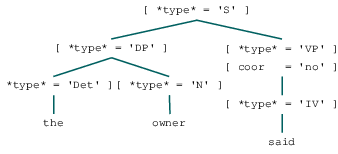

In [499]:
s11 = 'the owner said'
parse_and_display(s11, pr)

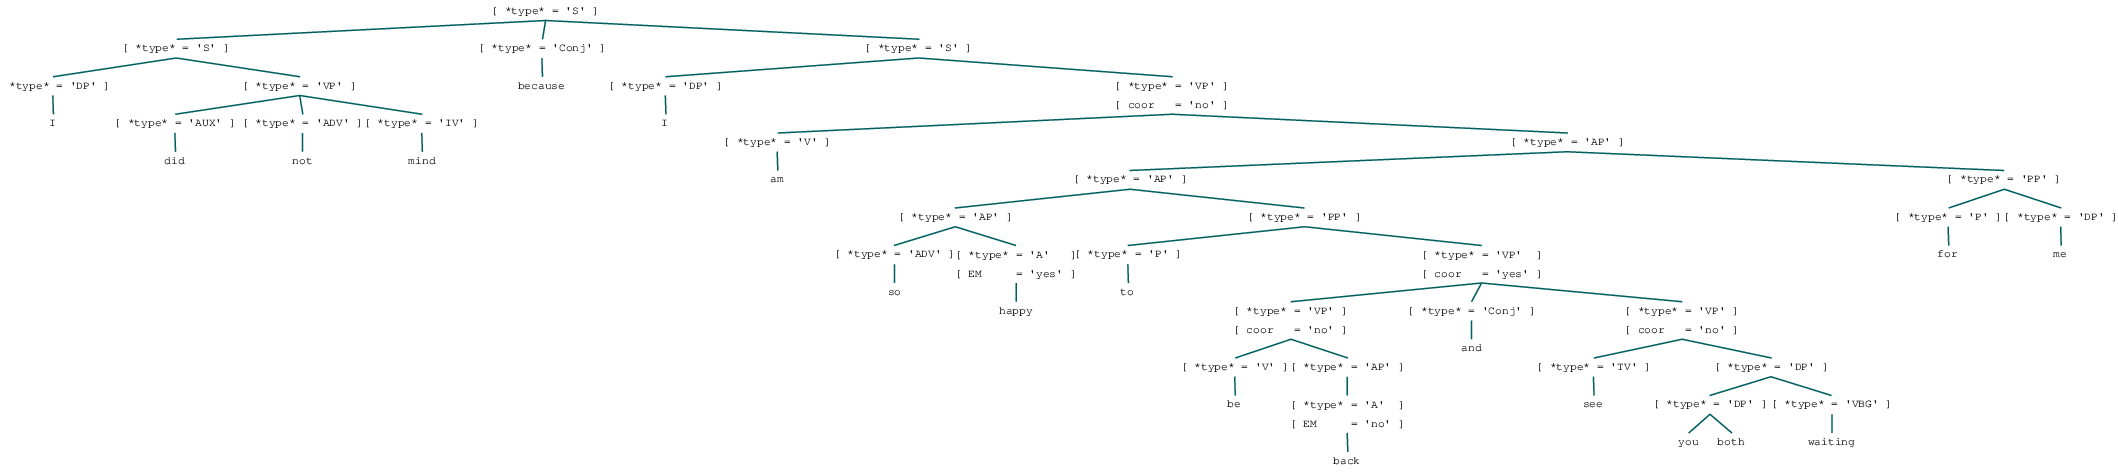

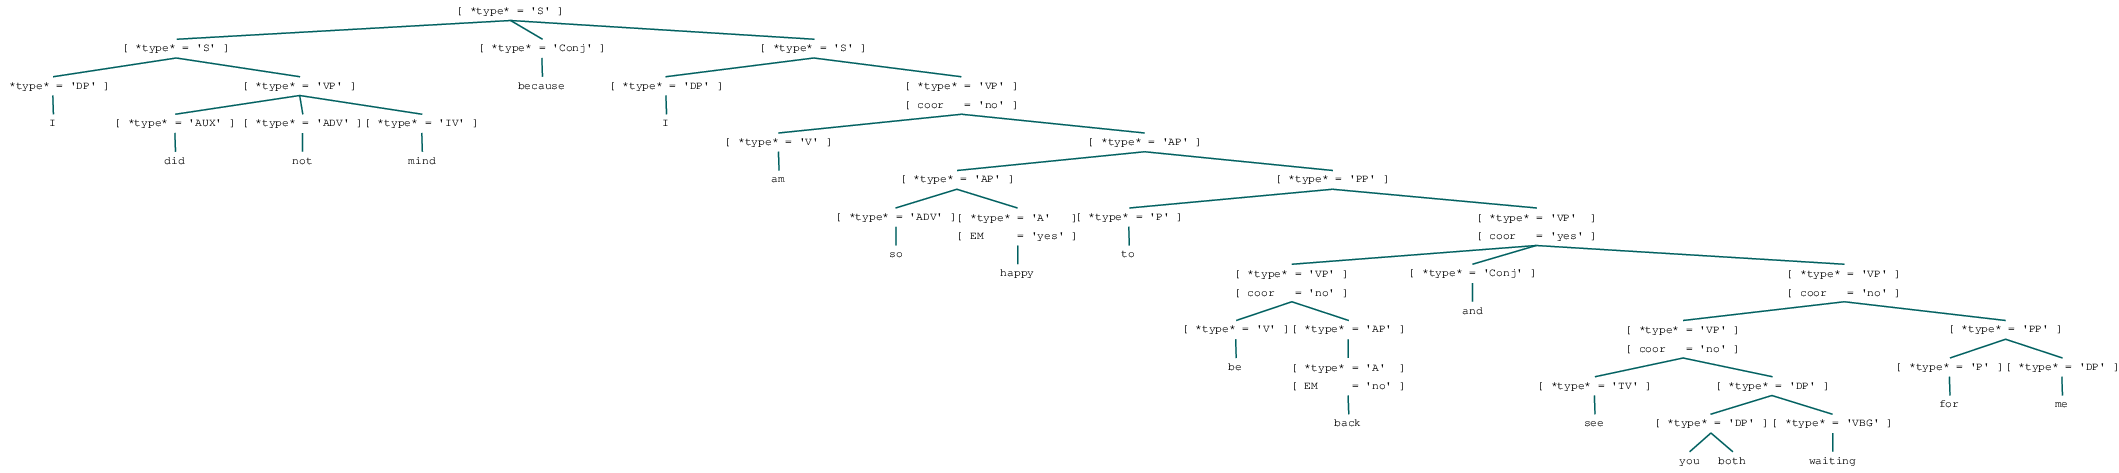

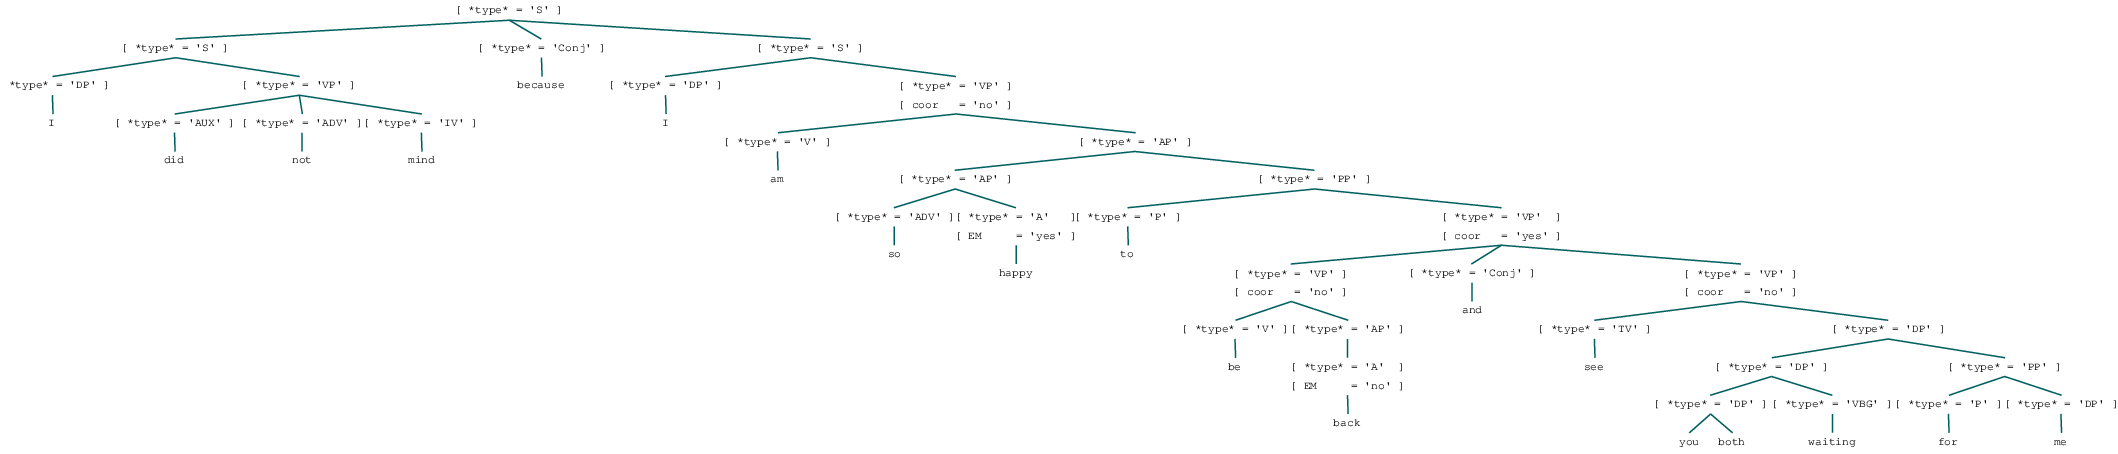

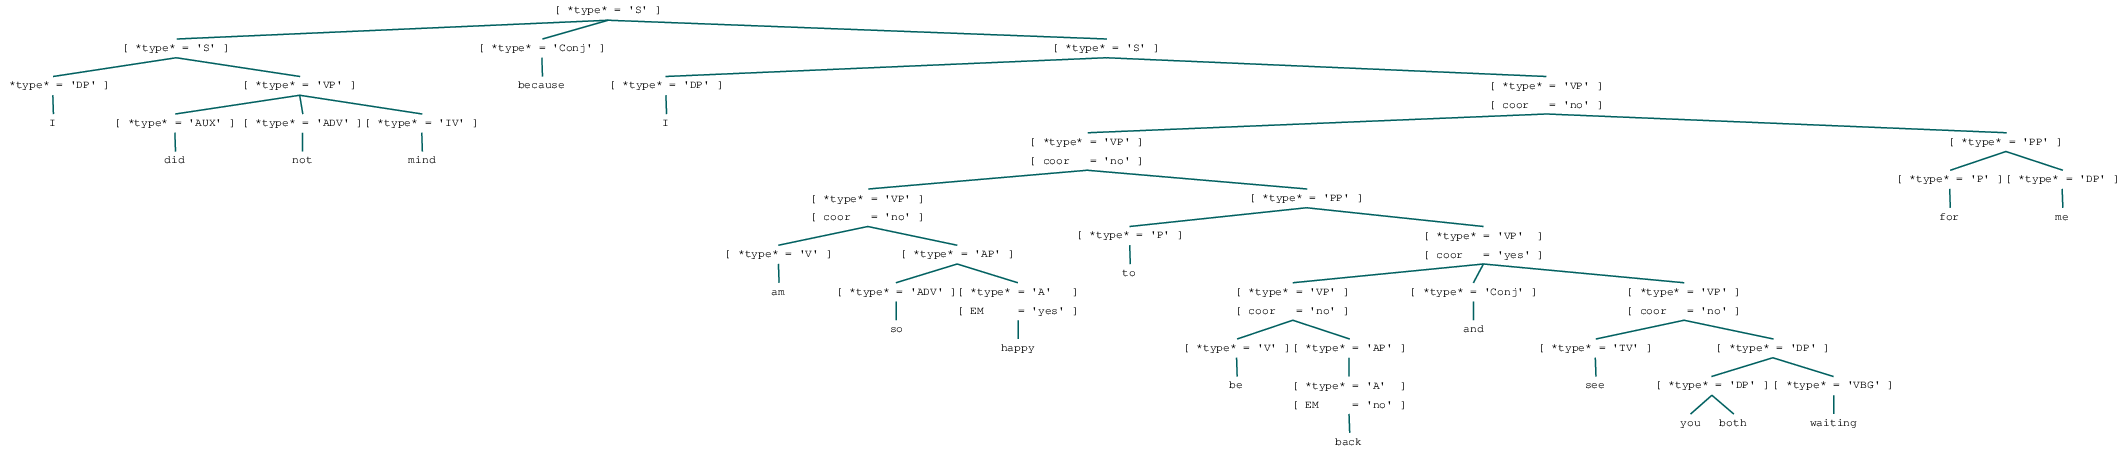

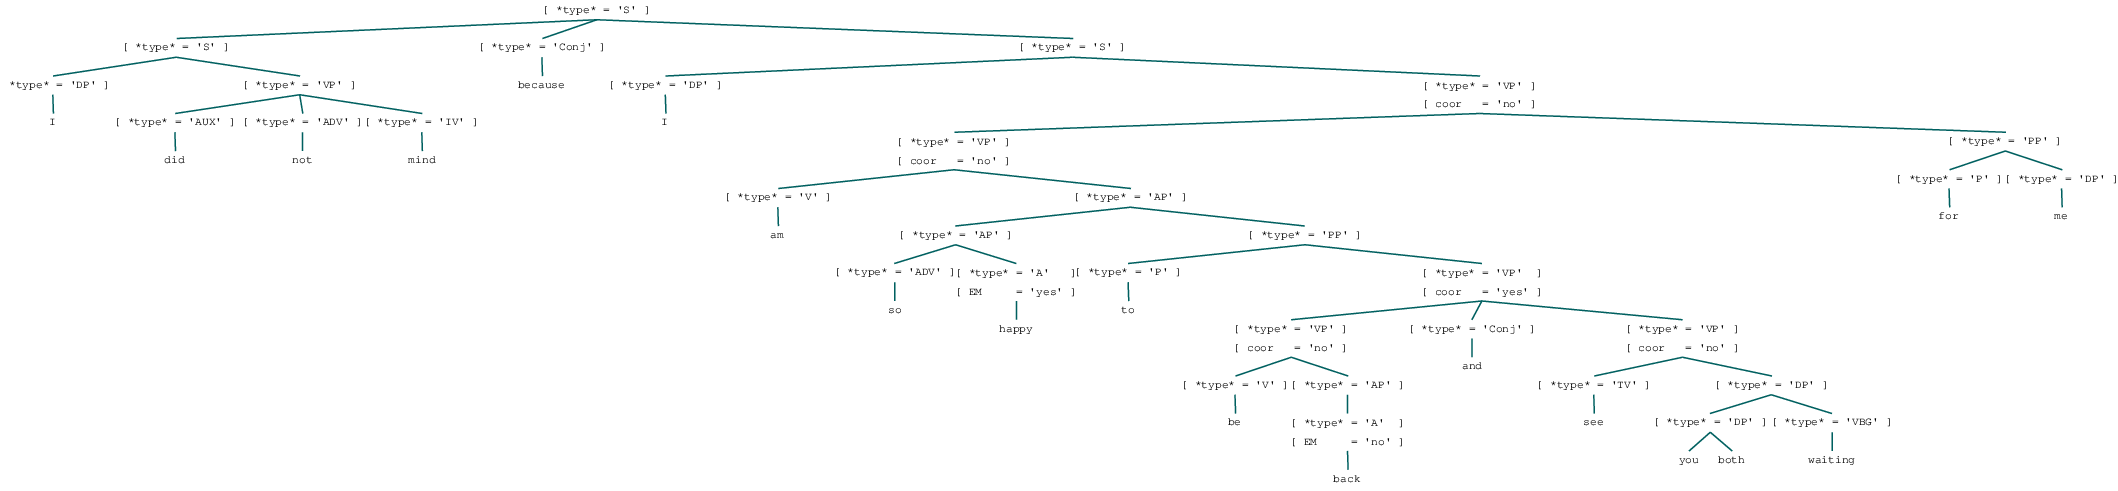

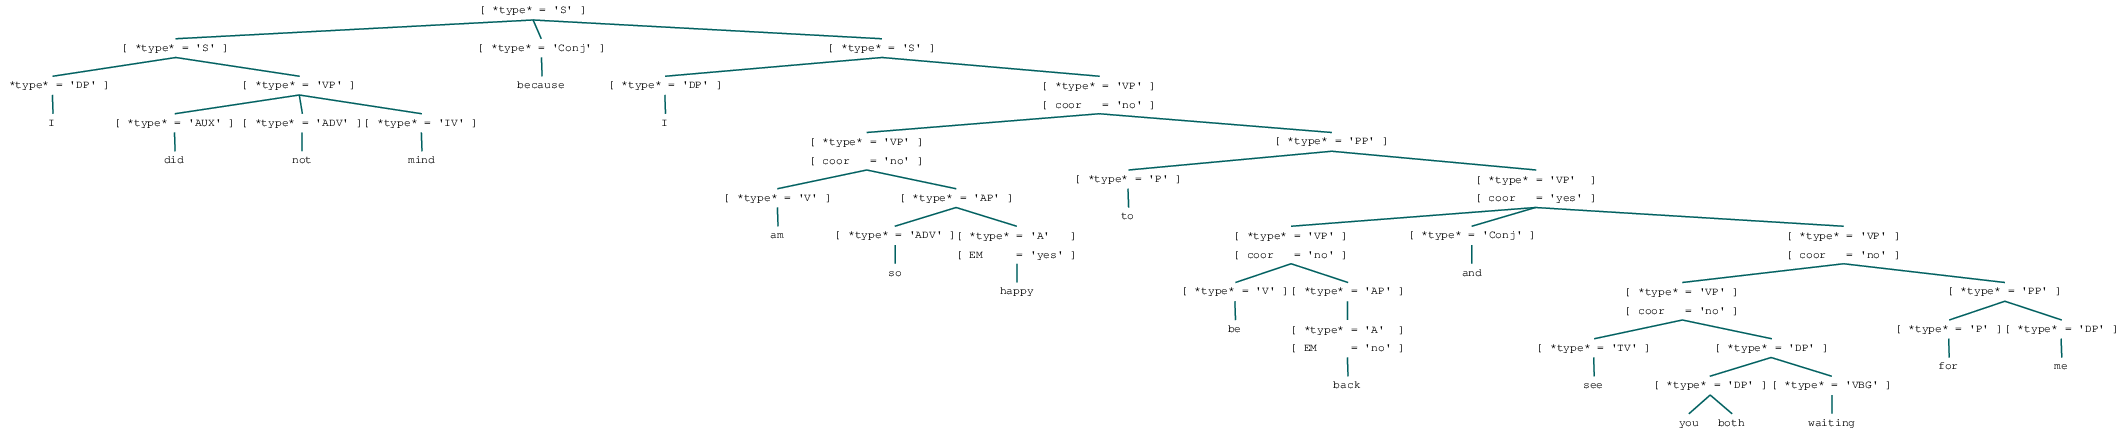

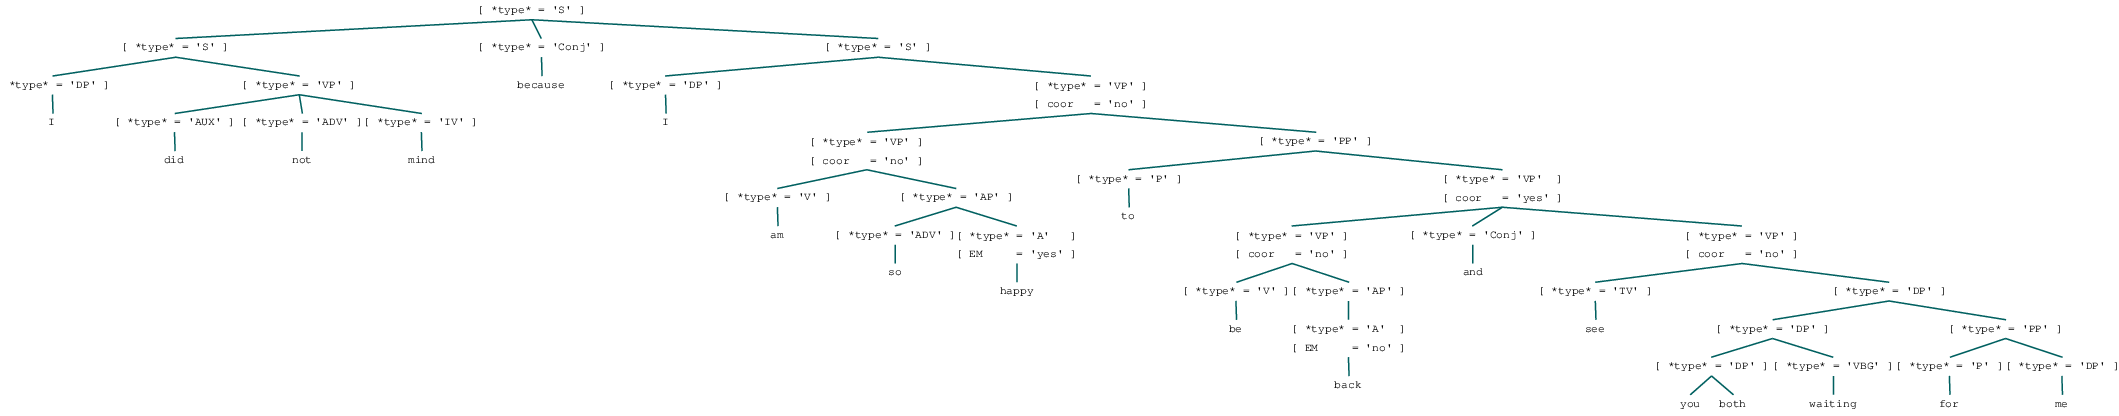

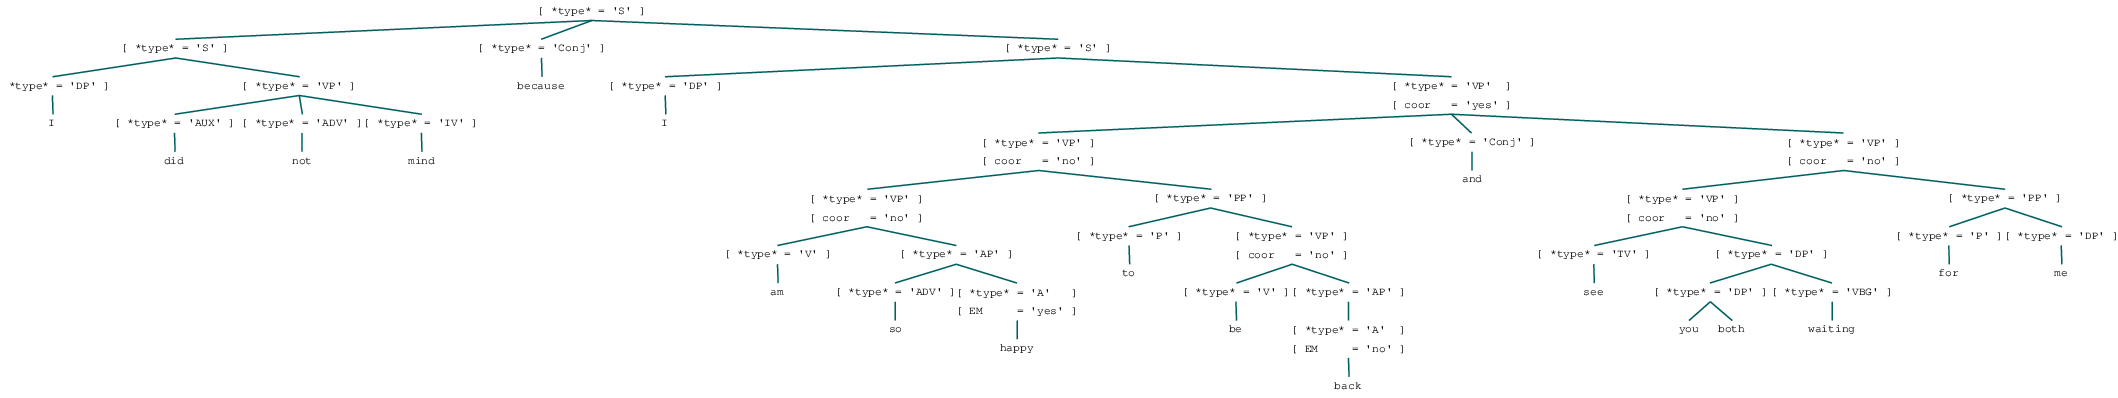

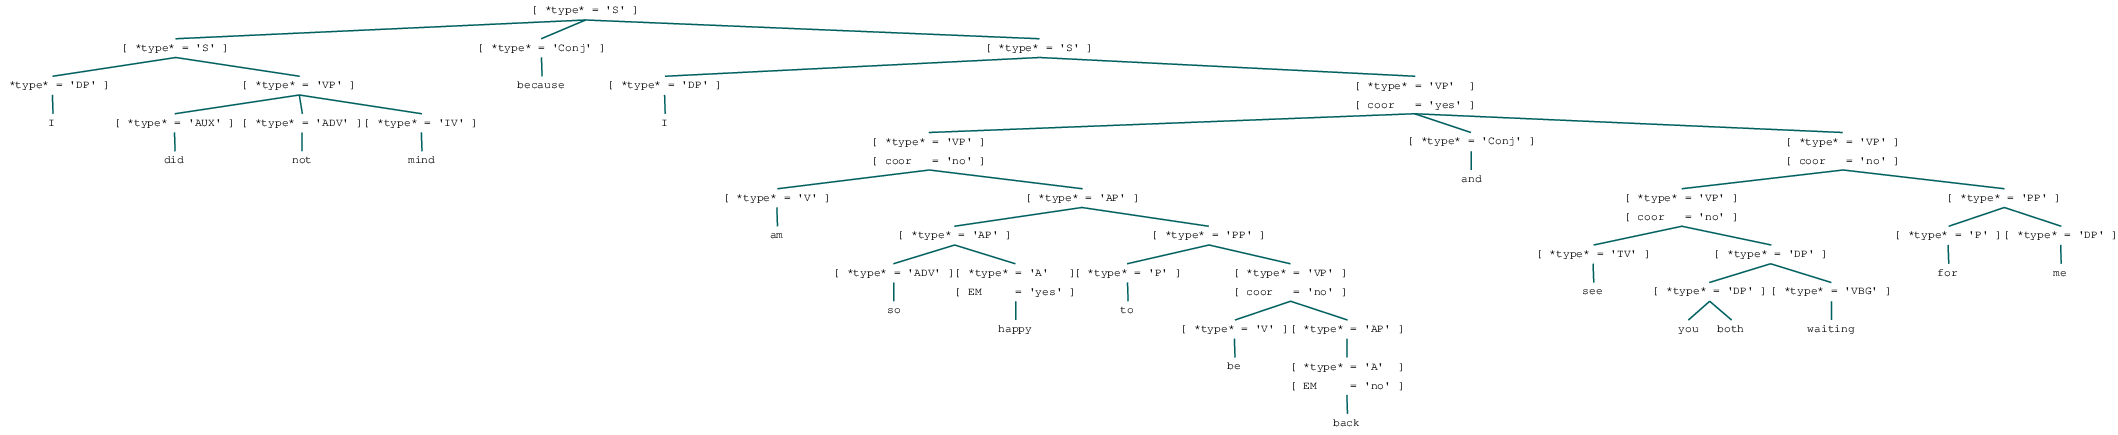

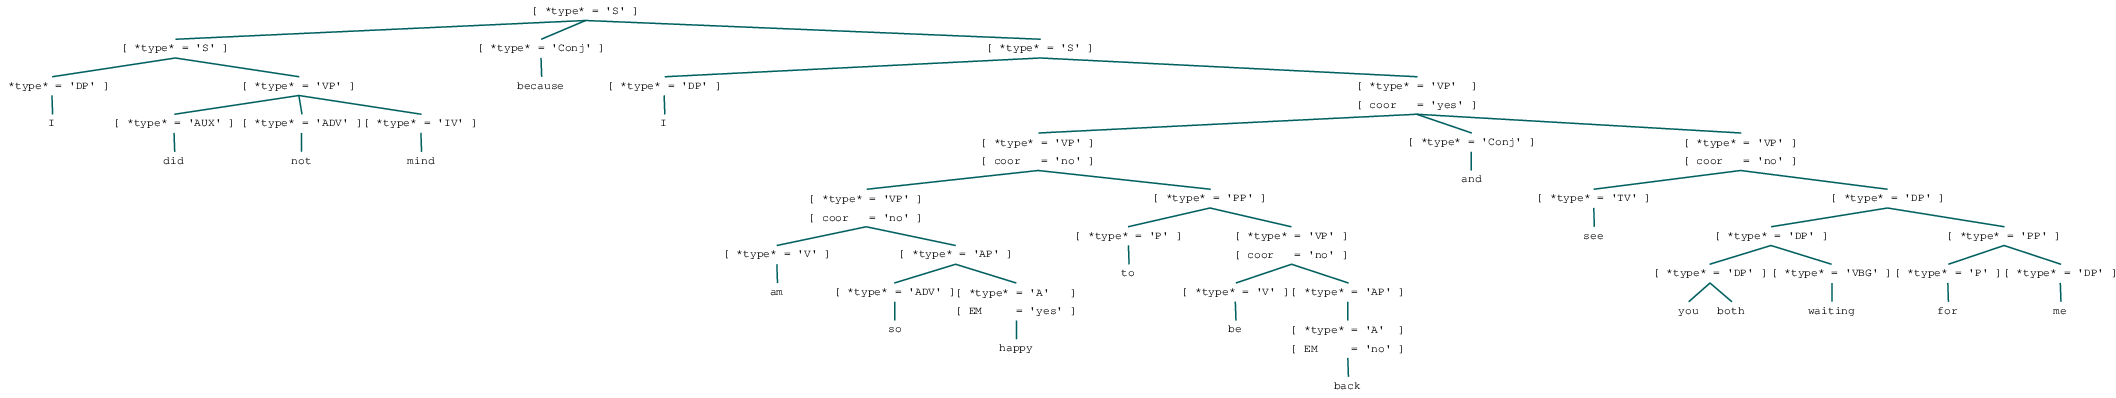

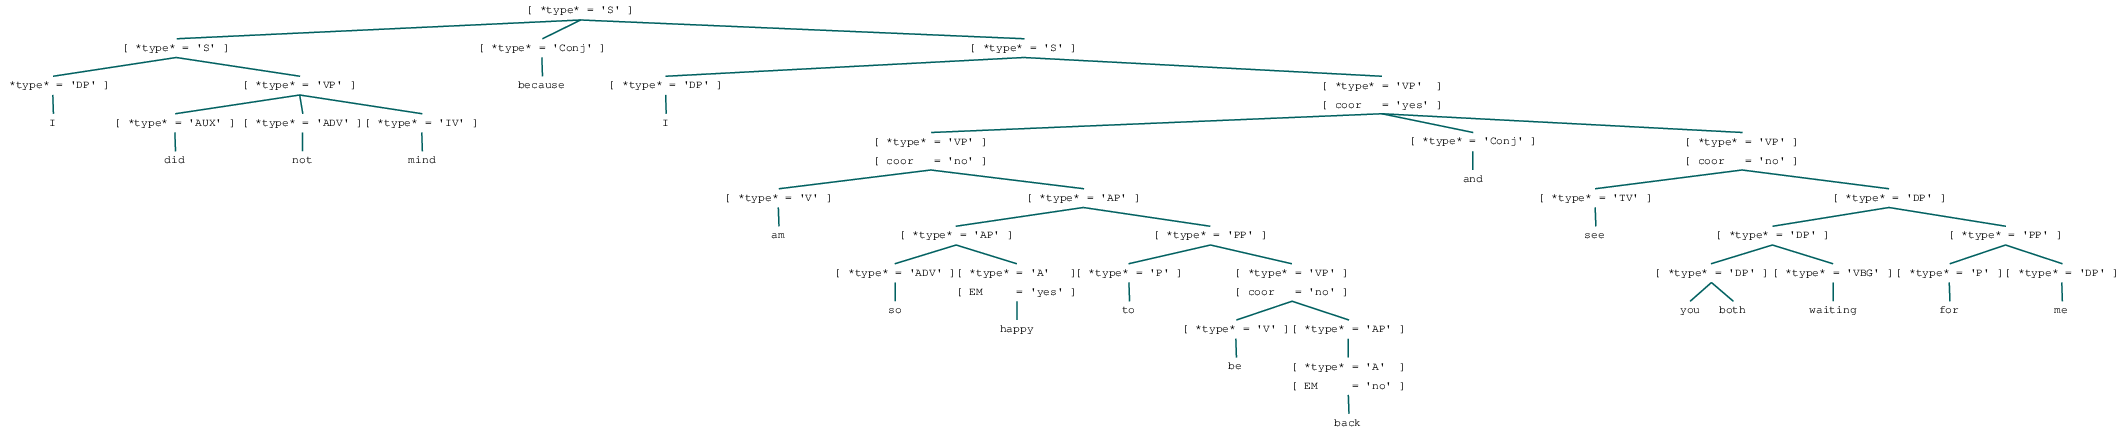

In [502]:
s12 = "I did not mind because I am so happy to be back and see you both waiting for me"
parse_and_display(s12, pr)

## Challenge 2: Except for

## Short Story 2:
The dog ran home. The cat followed. They arrived. The house was empty. The dog whined. The cat meowed. They searched every room. There was no sign of the owner. Feeling worried, they decided to sit by the door. Hours passed. The sun began to set. They heard the sound of a car pulling into the driveway. They rushed. They wagged their tails. The cat was meowing excitedly. The owner walked in and scooped them up. The owner gave them a pat on the head. "I am sorry that I was gone for a long walk," the owner said. "I am back and so happy to see you both."


In [569]:
pr = load_parser('./final_grammar.fcfg', trace=0,cache=False)
pr = load_parser('./ling4424-final.fcfg', trace=0,cache=False)

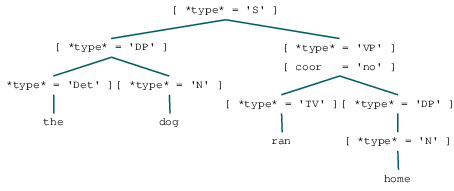

In [570]:
s1 = 'the dog ran home'
parse_and_display(s1, pr)

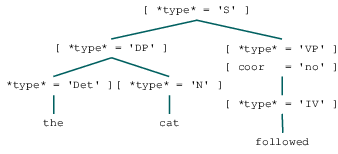

In [571]:
s2 = 'the cat followed'
parse_and_display(s2, pr)

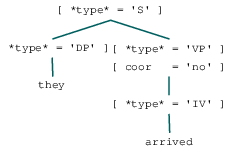

In [572]:
s3 = 'they arrived'
parse_and_display(s3, pr)

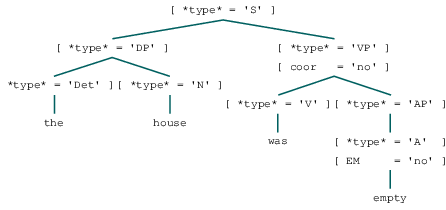

In [573]:
s4 = 'the house was empty'
parse_and_display(s4, pr)

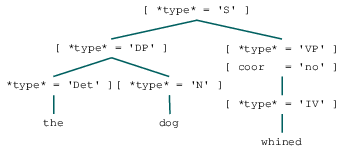

In [574]:
s5 = 'the dog whined'
parse_and_display(s5, pr)

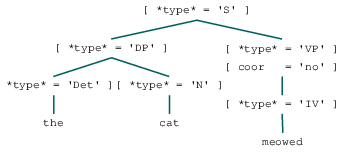

In [575]:
s6 = 'the cat meowed'
parse_and_display(s6, pr)

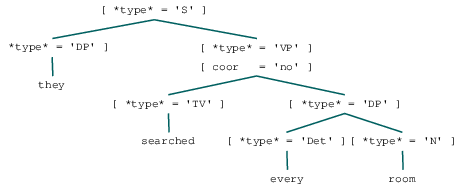

In [576]:
s7 = 'they searched every room'
parse_and_display(s7, pr)

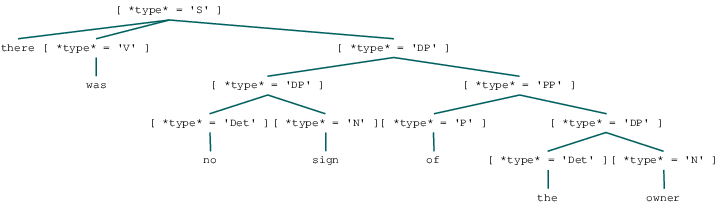

In [577]:
s8 = 'there was no sign of the owner'
parse_and_display(s8, pr)

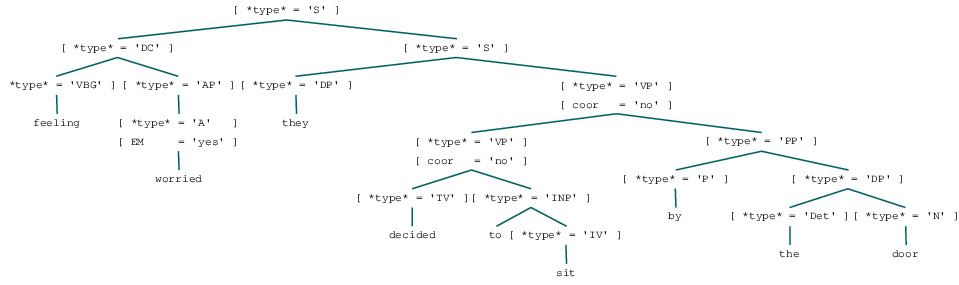

In [578]:
s9 = 'feeling worried they decided to sit by the door'
parse_and_display(s9, pr)

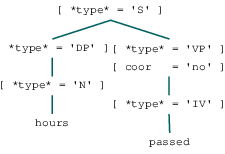

In [579]:
s10 = 'hours passed'
parse_and_display(s10, pr)

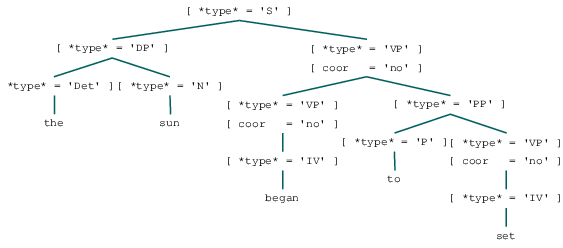

In [580]:
s11 = 'the sun began to set'
parse_and_display(s11, pr)

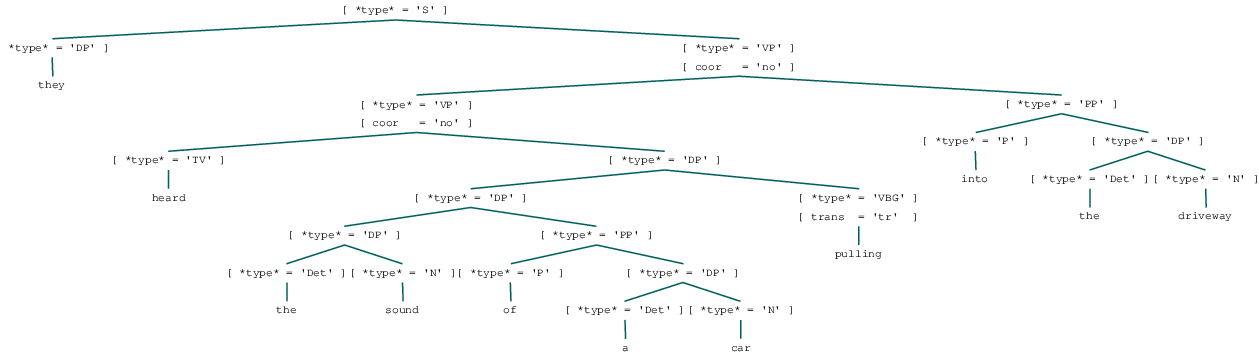

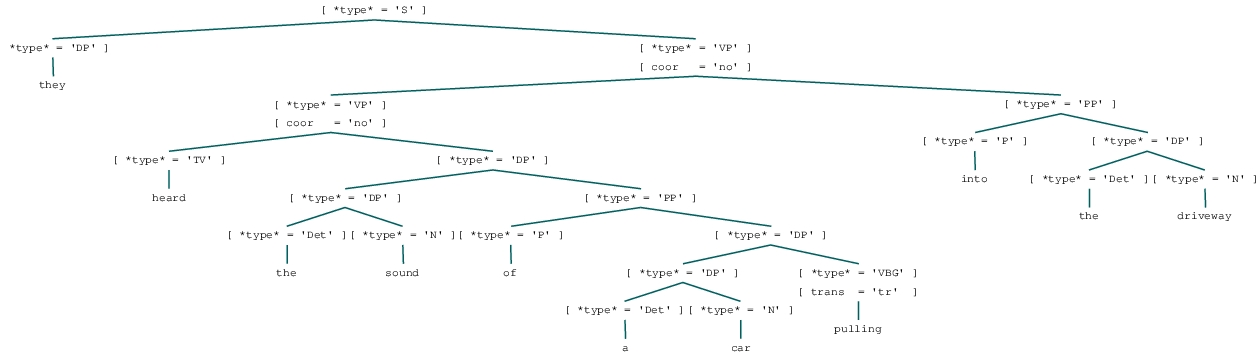

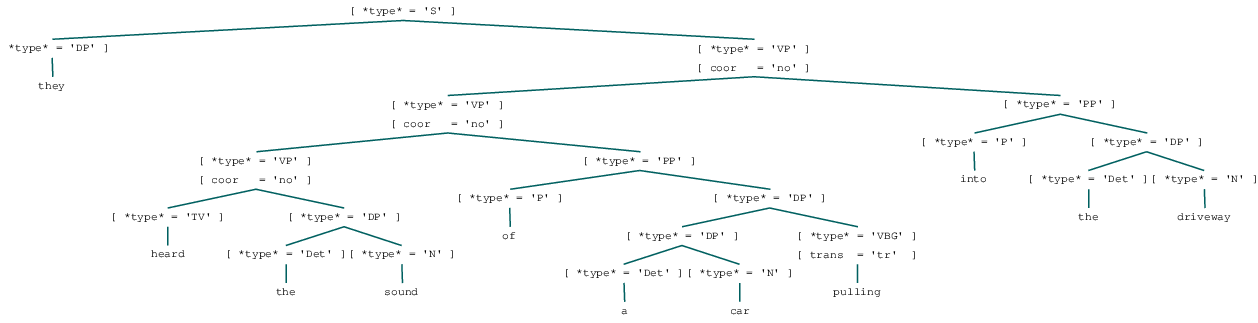

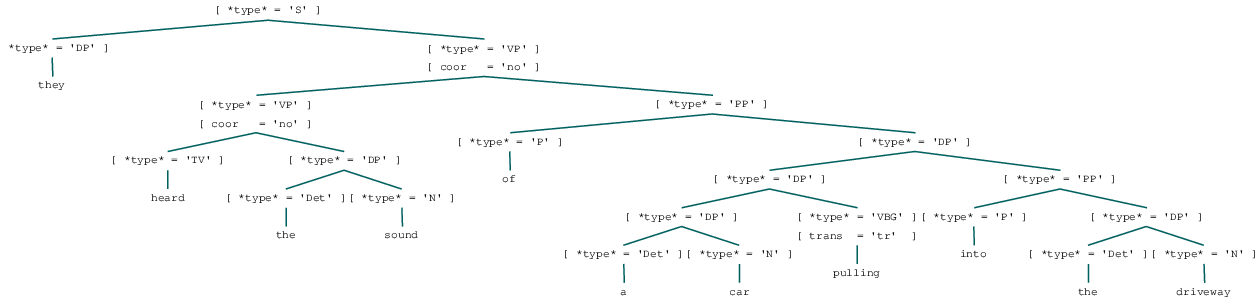

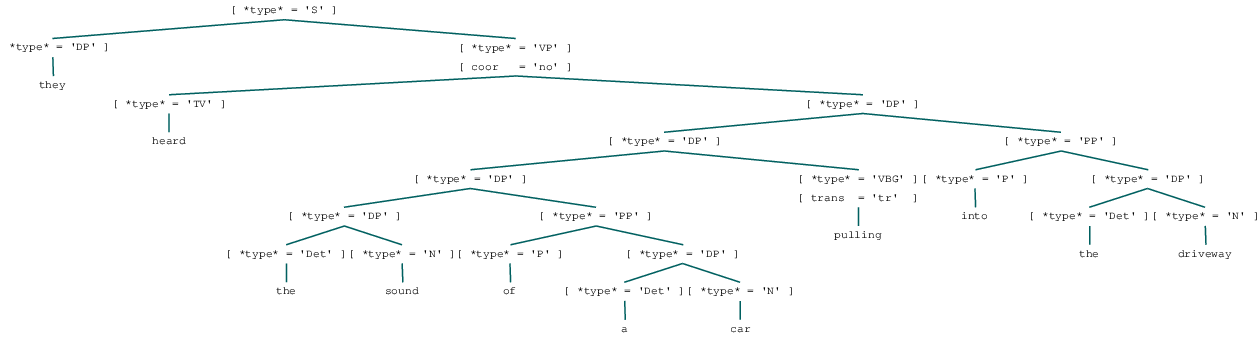

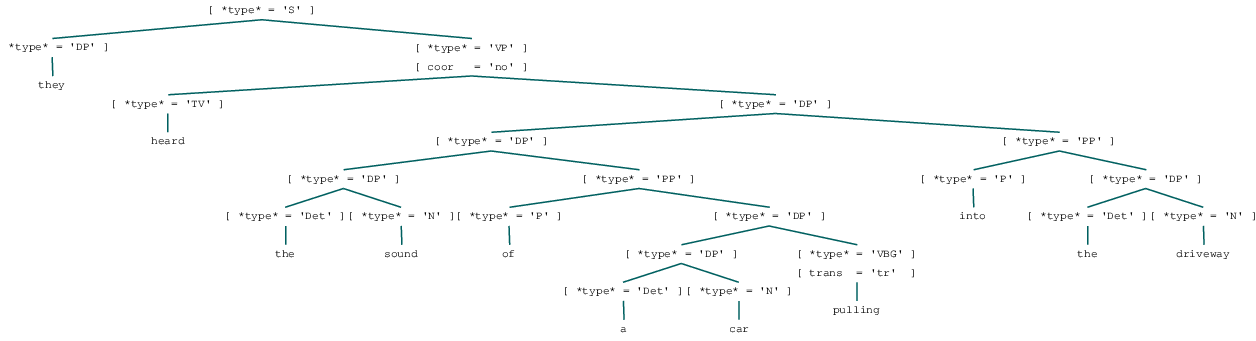

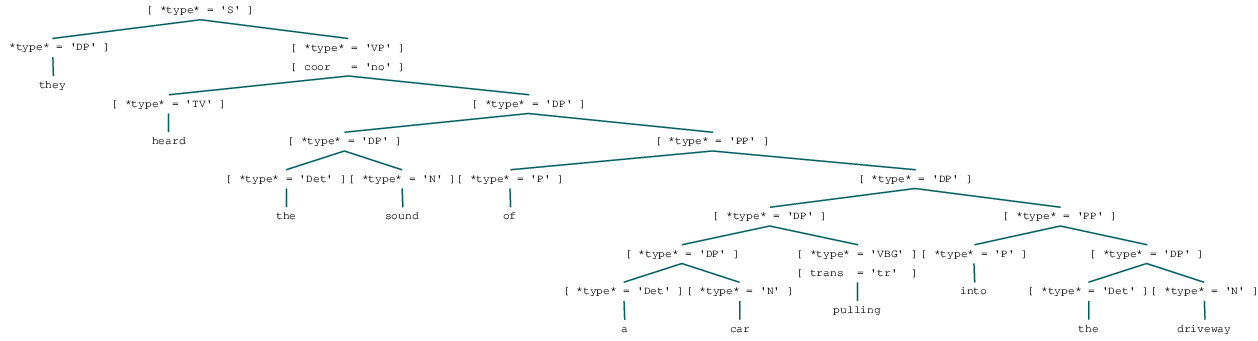

In [581]:
s12 = 'they heard the sound of a car pulling into the driveway'
parse_and_display(s12, pr)

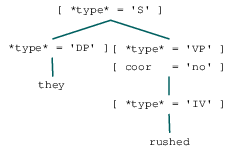

In [582]:
s13 = 'they rushed'
parse_and_display(s13, pr)

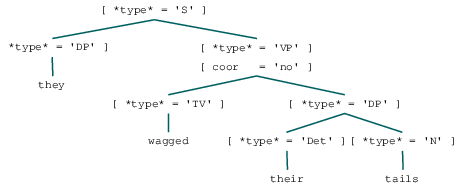

In [583]:
s14 = 'they wagged their tails'
parse_and_display(s14, pr)

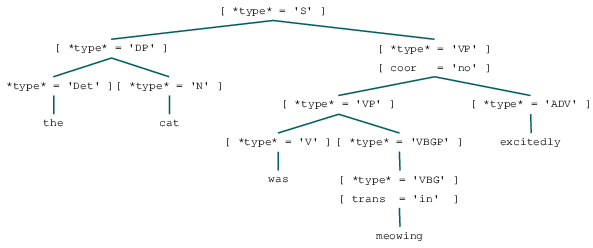

In [584]:
s15 = 'the cat was meowing excitedly'
parse_and_display(s15, pr)

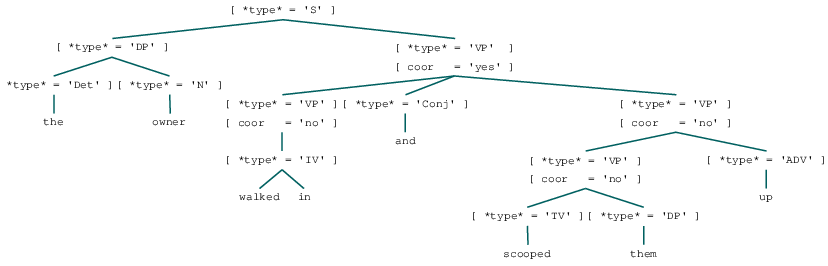

In [585]:
s16 = 'the owner walked in and scooped them up'
parse_and_display(s16, pr)

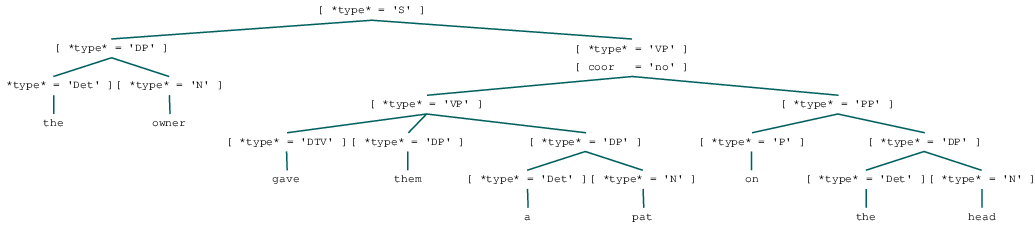

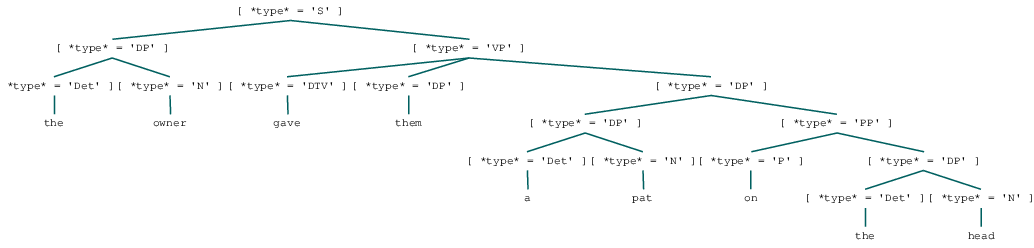

In [586]:
s17 = 'the owner gave them a pat on the head'
parse_and_display(s17, pr)

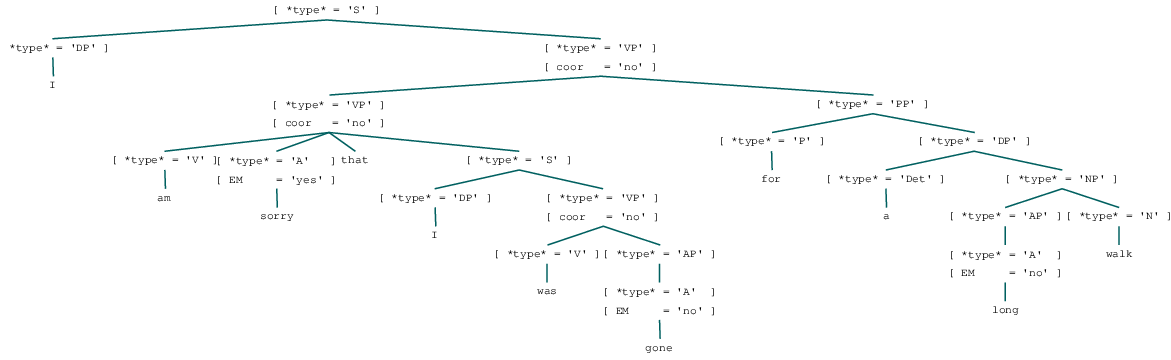

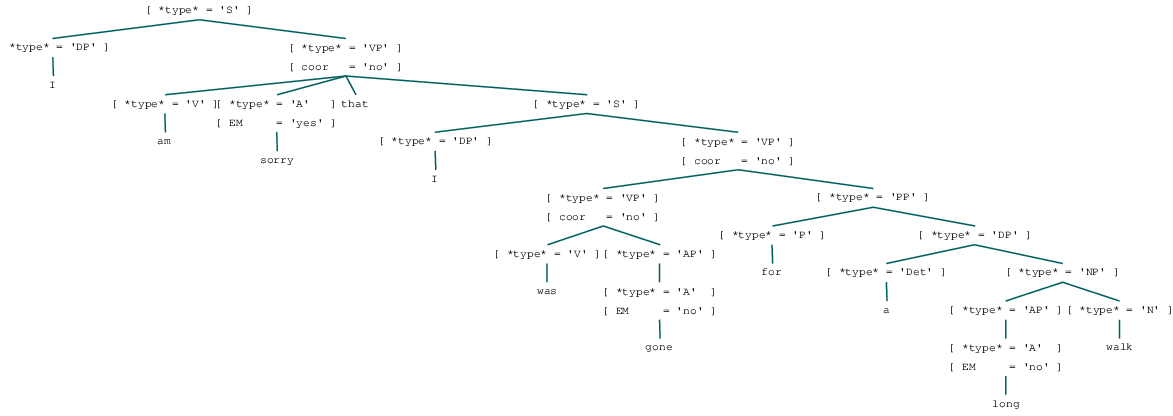

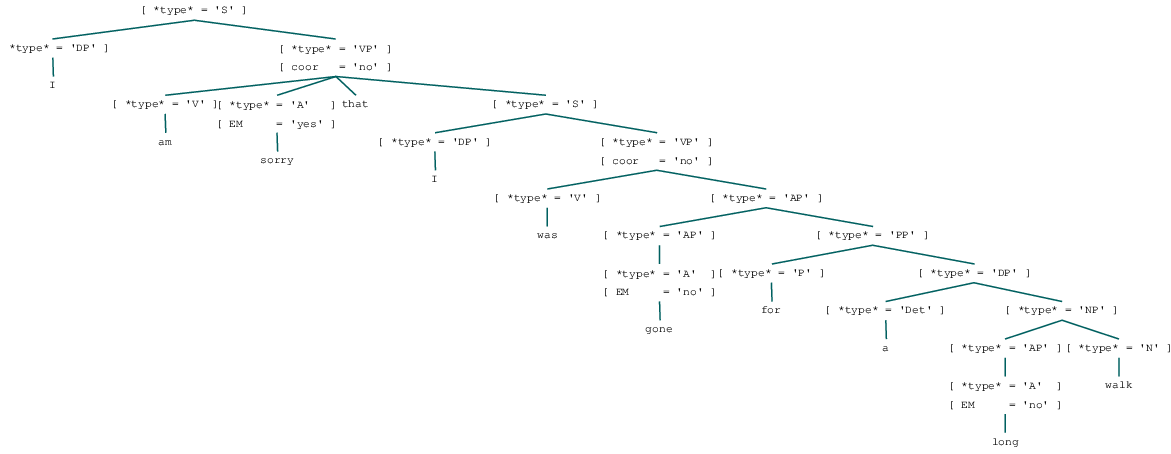

In [587]:
s18 = 'I am sorry that I was gone for a long walk'
parse_and_display(s18, pr)

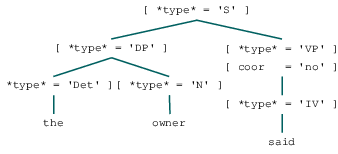

In [588]:
s19 = 'the owner said'
parse_and_display(s19, pr)

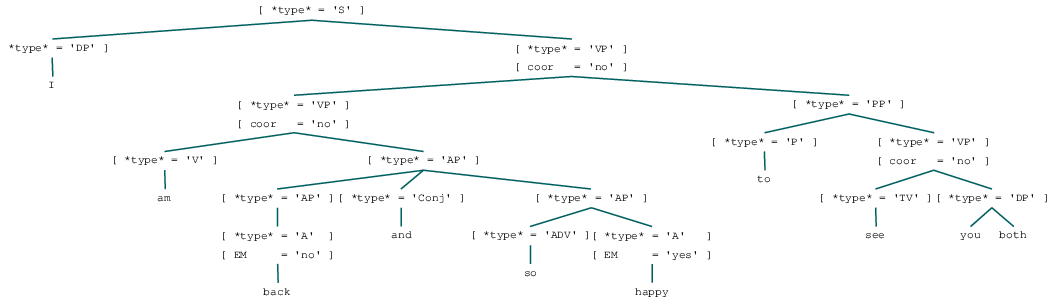

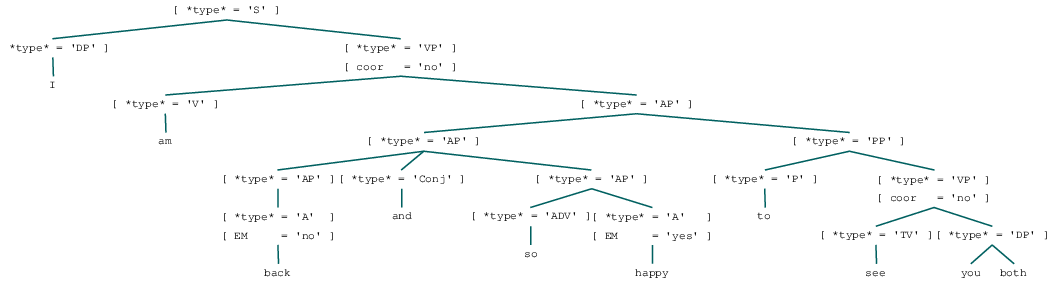

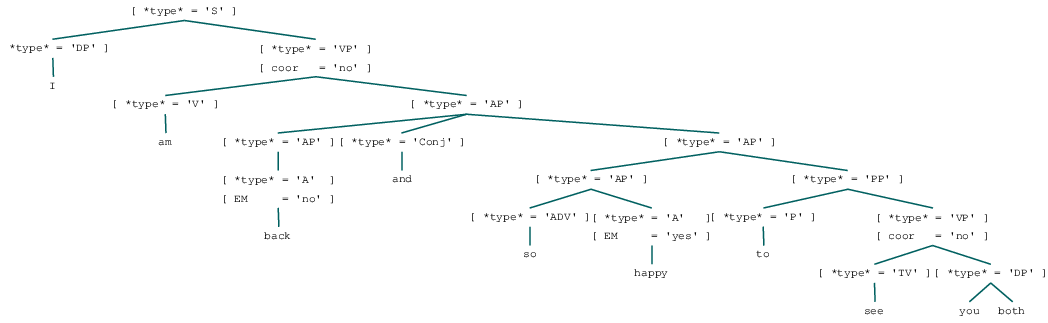

In [590]:
s20 = 'I am back and so happy to see you both'
parse_and_display(s20, pr)

## Short Story 3:
They searched every room, pulling curtains and drawers. They saw no sign of the owner. They were confused and worried, but they decided to sit and wait by the door. Hours passed and it was sunset. They heard a sound. A car was pulling into the driveway. They rushed wagging their tails to the door. The owner arrived, late but happily. They scooped the dog and cat, giving each a pat on the head. "Sorry for the wait," the owner said. The dog and cat meowed in response because they were happy to see their owner.


In [662]:
pr = load_parser('./final_grammar.fcfg', trace=0,cache=False)
pr = load_parser('./ling4424-final.fcfg', trace=0,cache=False)

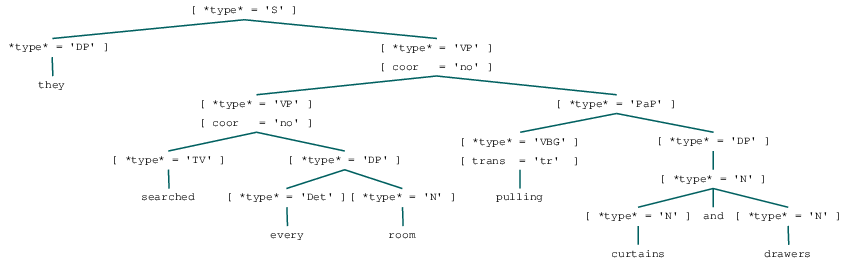

In [649]:
s1 = 'they searched every room pulling curtains and drawers'
parse_and_display(s1, pr)

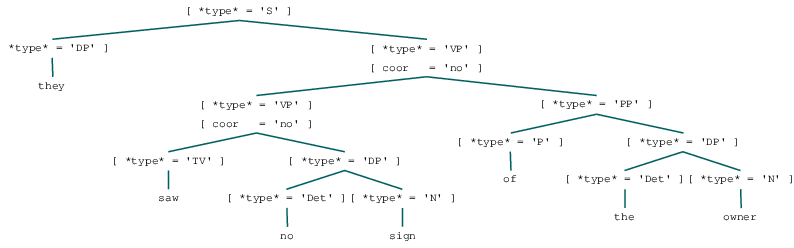

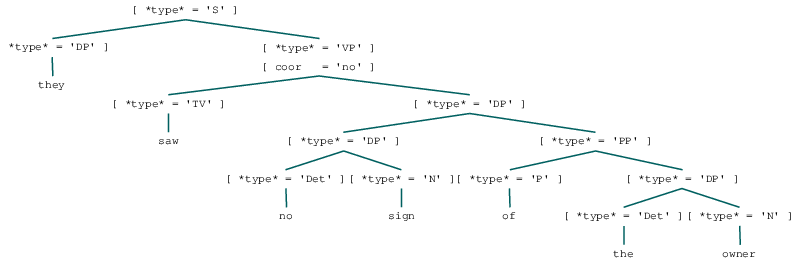

In [650]:
s2 = 'they saw no sign of the owner'
parse_and_display(s2, pr)

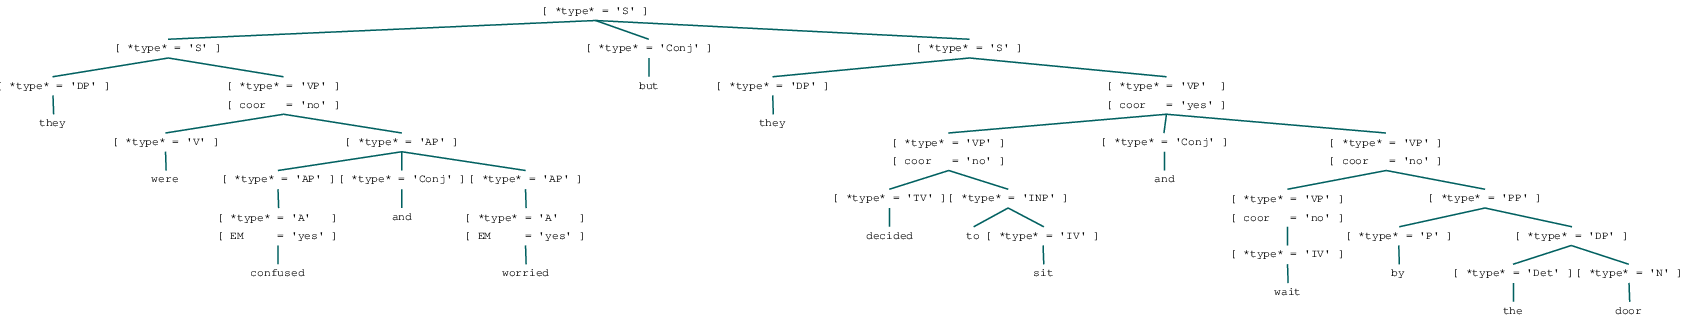

In [651]:
s3 = 'they were confused and worried but they decided to sit and wait by the door'
parse_and_display(s3, pr)

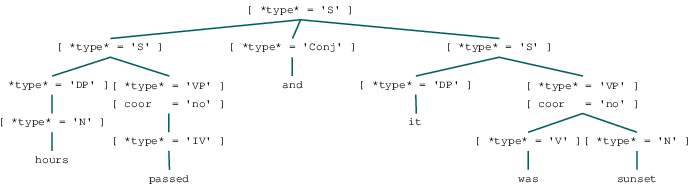

In [652]:
s4 = 'hours passed and it was sunset'
parse_and_display(s4, pr)

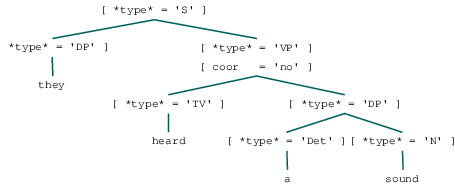

In [653]:
s5 = 'they heard a sound'
parse_and_display(s5, pr)

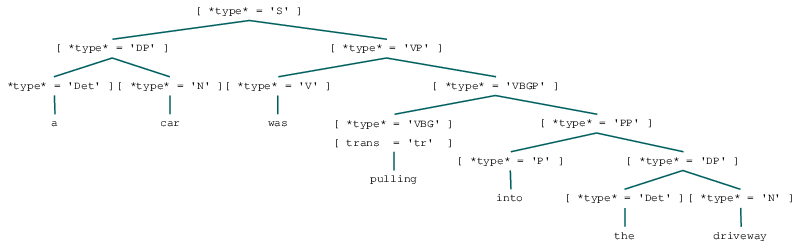

In [654]:
s6 = 'a car was pulling into the driveway'
parse_and_display(s6, pr)

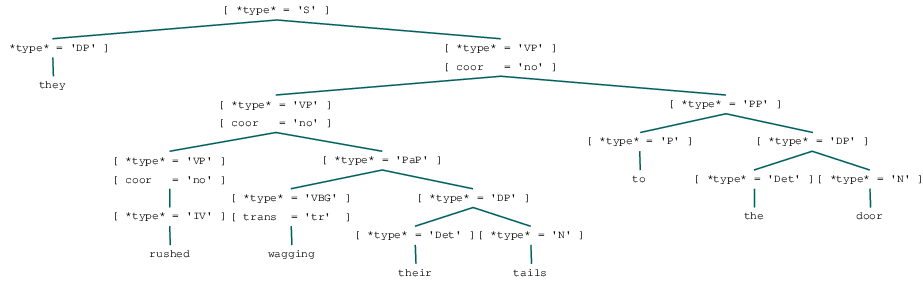

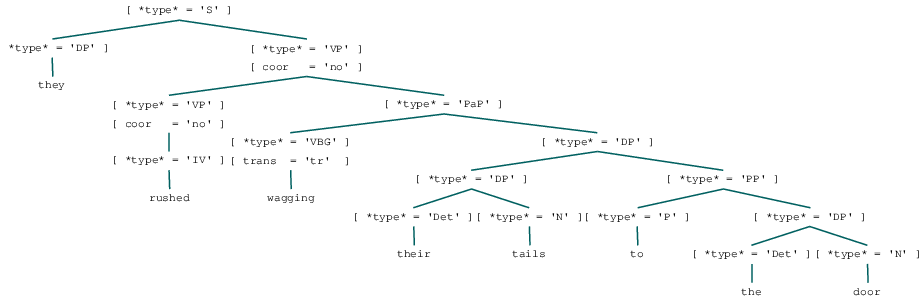

In [655]:
s7 = 'they rushed wagging their tails to the door'
parse_and_display(s7, pr)

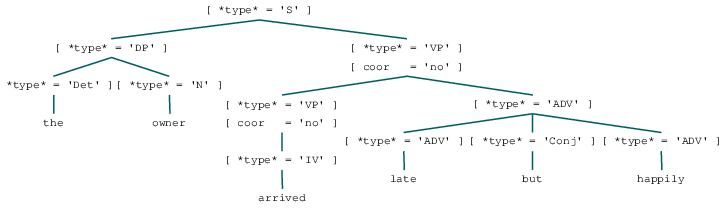

In [656]:
s8 = 'the owner arrived late but happily'
parse_and_display(s8, pr)

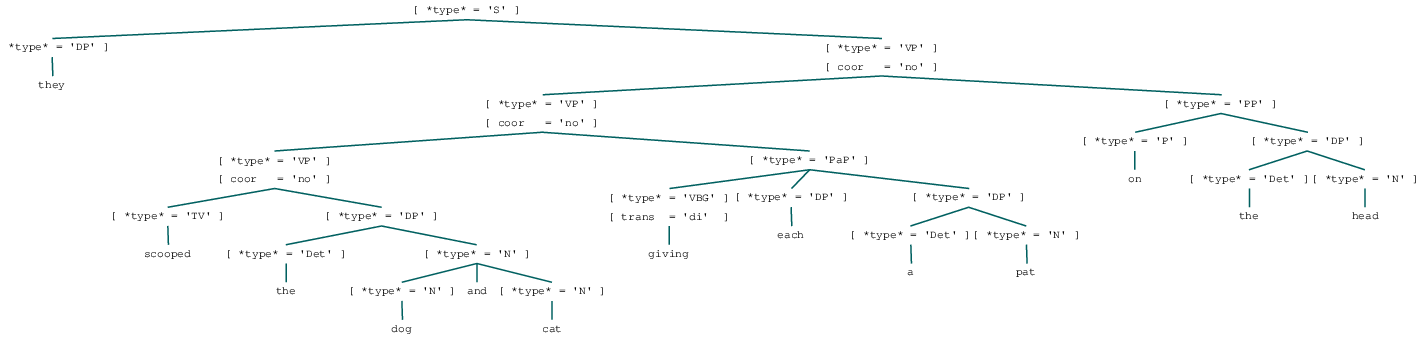

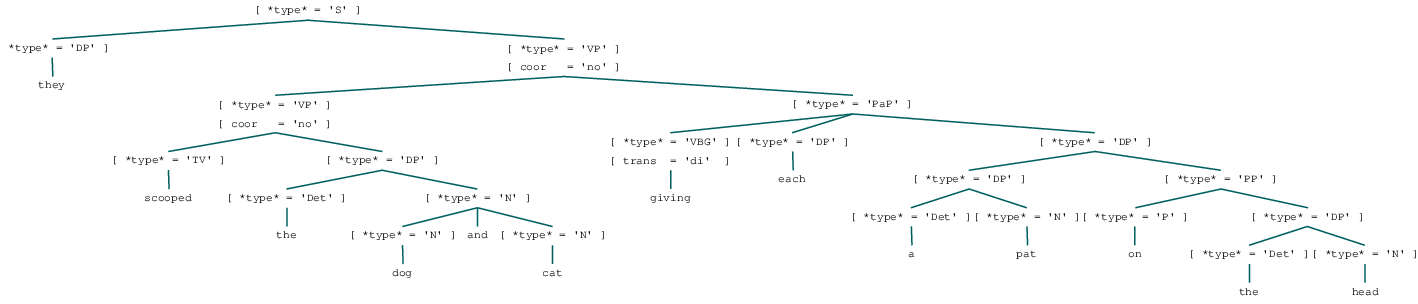

In [657]:
s9 = 'they scooped the dog and cat giving each a pat on the head'
parse_and_display(s9, pr)

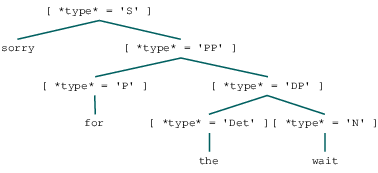

In [663]:
s10 = 'sorry for the wait'
parse_and_display(s10, pr)

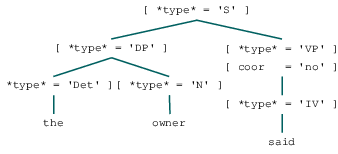

In [659]:
s11 = 'the owner said'
parse_and_display(s11, pr)

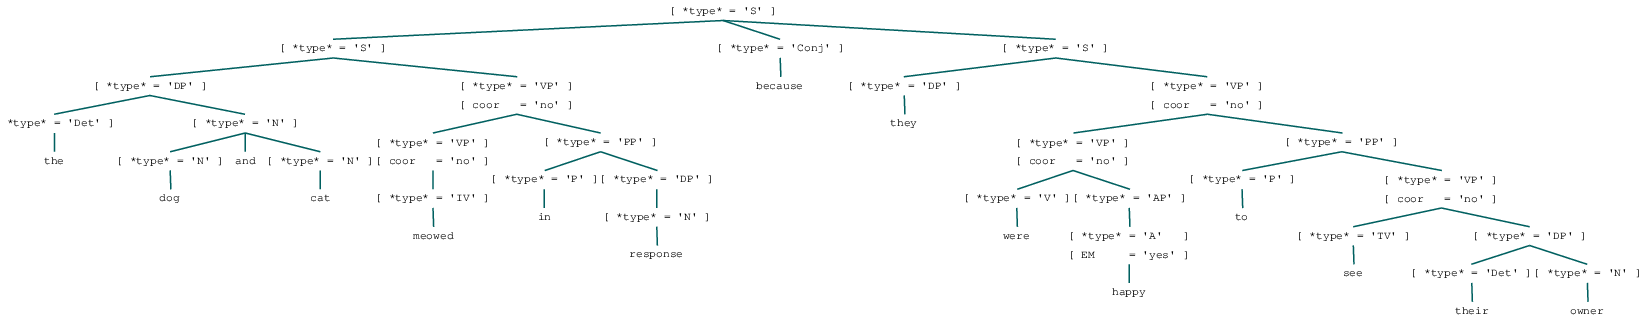

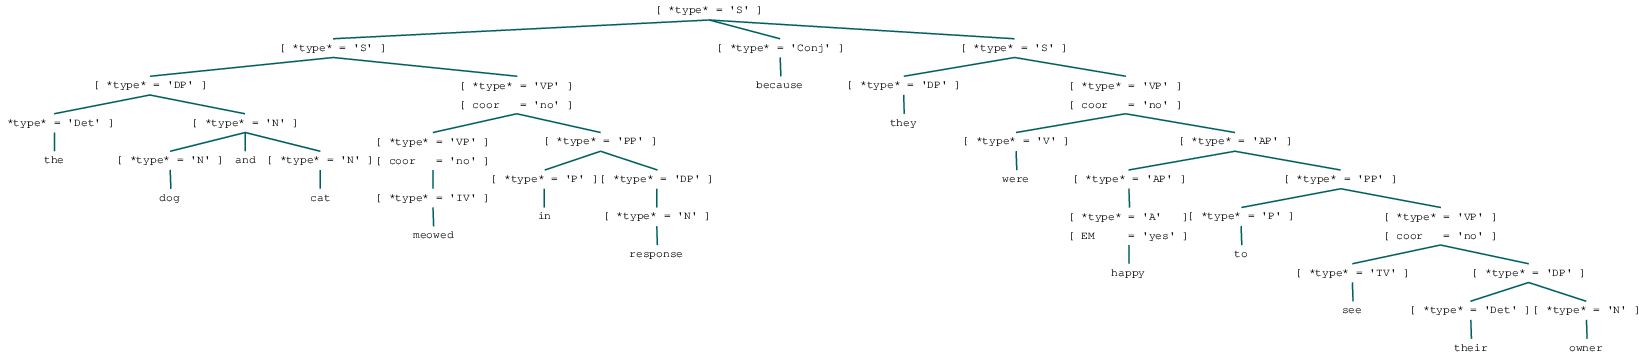

In [667]:
s12 = 'the dog and cat meowed in response because they were happy to see their owner'
parse_and_display(s12, pr)